# Face Generation

In this project, you'll define and train a Generative Adverserial network of your own creation on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **defining new architectures training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset has higher resolution images than datasets you have previously worked with (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed-celeba-small/`.

In [1]:
# run this once to unzip the file
!unzip processed-celeba-small.zip

Archive:  processed-celeba-small.zip
   creating: processed_celeba_small/
  inflating: processed_celeba_small/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/processed_celeba_small/
  inflating: __MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/celeba/
  inflating: processed_celeba_small/celeba/.DS_Store  
   creating: __MACOSX/processed_celeba_small/celeba/
  inflating: __MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/celeba/161982.jpg  
  inflating: processed_celeba_small/celeba/161983.jpg  
  inflating: processed_celeba_small/celeba/161984.jpg  
  inflating: processed_celeba_small/celeba/161985.jpg  
  inflating: processed_celeba_small/celeba/161986.jpg  
  inflating: processed_celeba_small/celeba/161987.jpg  
  inflating: processed_celeb

  inflating: processed_celeba_small/celeba/162118.jpg  
  inflating: processed_celeba_small/celeba/162119.jpg  
  inflating: processed_celeba_small/celeba/162120.jpg  
  inflating: processed_celeba_small/celeba/162121.jpg  
  inflating: processed_celeba_small/celeba/162122.jpg  
  inflating: processed_celeba_small/celeba/162123.jpg  
  inflating: processed_celeba_small/celeba/162124.jpg  
  inflating: processed_celeba_small/celeba/162125.jpg  
  inflating: processed_celeba_small/celeba/162126.jpg  
  inflating: processed_celeba_small/celeba/162127.jpg  
  inflating: processed_celeba_small/celeba/162128.jpg  
  inflating: processed_celeba_small/celeba/162129.jpg  
  inflating: processed_celeba_small/celeba/162130.jpg  
  inflating: processed_celeba_small/celeba/162131.jpg  
  inflating: processed_celeba_small/celeba/162132.jpg  
  inflating: processed_celeba_small/celeba/162133.jpg  
  inflating: processed_celeba_small/celeba/162134.jpg  
  inflating: processed_celeba_small/celeba/16213

  inflating: processed_celeba_small/celeba/162336.jpg  
  inflating: processed_celeba_small/celeba/162337.jpg  
  inflating: processed_celeba_small/celeba/162338.jpg  
  inflating: processed_celeba_small/celeba/162339.jpg  
  inflating: processed_celeba_small/celeba/162340.jpg  
  inflating: processed_celeba_small/celeba/162341.jpg  
  inflating: processed_celeba_small/celeba/162342.jpg  
  inflating: processed_celeba_small/celeba/162343.jpg  
  inflating: processed_celeba_small/celeba/162344.jpg  
  inflating: processed_celeba_small/celeba/162345.jpg  
  inflating: processed_celeba_small/celeba/162346.jpg  
  inflating: processed_celeba_small/celeba/162347.jpg  
  inflating: processed_celeba_small/celeba/162348.jpg  
  inflating: processed_celeba_small/celeba/162349.jpg  
  inflating: processed_celeba_small/celeba/162350.jpg  
  inflating: processed_celeba_small/celeba/162351.jpg  
  inflating: processed_celeba_small/celeba/162352.jpg  
  inflating: processed_celeba_small/celeba/16235

  inflating: processed_celeba_small/celeba/162565.jpg  
  inflating: processed_celeba_small/celeba/162566.jpg  
  inflating: processed_celeba_small/celeba/162567.jpg  
  inflating: processed_celeba_small/celeba/162568.jpg  
  inflating: processed_celeba_small/celeba/162569.jpg  
  inflating: processed_celeba_small/celeba/162570.jpg  
  inflating: processed_celeba_small/celeba/162571.jpg  
  inflating: processed_celeba_small/celeba/162572.jpg  
  inflating: processed_celeba_small/celeba/162573.jpg  
  inflating: processed_celeba_small/celeba/162574.jpg  
  inflating: processed_celeba_small/celeba/162575.jpg  
  inflating: processed_celeba_small/celeba/162576.jpg  
  inflating: processed_celeba_small/celeba/162577.jpg  
  inflating: processed_celeba_small/celeba/162578.jpg  
  inflating: processed_celeba_small/celeba/162579.jpg  
  inflating: processed_celeba_small/celeba/162580.jpg  
  inflating: processed_celeba_small/celeba/162581.jpg  
  inflating: processed_celeba_small/celeba/16258

  inflating: processed_celeba_small/celeba/162765.jpg  
  inflating: processed_celeba_small/celeba/162766.jpg  
  inflating: processed_celeba_small/celeba/162767.jpg  
  inflating: processed_celeba_small/celeba/162768.jpg  
  inflating: processed_celeba_small/celeba/162769.jpg  
  inflating: processed_celeba_small/celeba/162770.jpg  
  inflating: processed_celeba_small/celeba/162771.jpg  
  inflating: processed_celeba_small/celeba/162772.jpg  
  inflating: processed_celeba_small/celeba/162773.jpg  
  inflating: processed_celeba_small/celeba/162774.jpg  
  inflating: processed_celeba_small/celeba/162775.jpg  
  inflating: processed_celeba_small/celeba/162776.jpg  
  inflating: processed_celeba_small/celeba/162777.jpg  
  inflating: processed_celeba_small/celeba/162778.jpg  
  inflating: processed_celeba_small/celeba/162779.jpg  
  inflating: processed_celeba_small/celeba/162780.jpg  
  inflating: processed_celeba_small/celeba/162781.jpg  
  inflating: processed_celeba_small/celeba/16278

  inflating: processed_celeba_small/celeba/162994.jpg  
  inflating: processed_celeba_small/celeba/162995.jpg  
  inflating: processed_celeba_small/celeba/162996.jpg  
  inflating: processed_celeba_small/celeba/162997.jpg  
  inflating: processed_celeba_small/celeba/162998.jpg  
  inflating: processed_celeba_small/celeba/162999.jpg  
  inflating: processed_celeba_small/celeba/163000.jpg  
  inflating: processed_celeba_small/celeba/163001.jpg  
  inflating: processed_celeba_small/celeba/163002.jpg  
  inflating: processed_celeba_small/celeba/163003.jpg  
  inflating: processed_celeba_small/celeba/163004.jpg  
  inflating: processed_celeba_small/celeba/163005.jpg  
  inflating: processed_celeba_small/celeba/163006.jpg  
  inflating: processed_celeba_small/celeba/163007.jpg  
  inflating: processed_celeba_small/celeba/163008.jpg  
  inflating: processed_celeba_small/celeba/163009.jpg  
  inflating: processed_celeba_small/celeba/163010.jpg  
  inflating: processed_celeba_small/celeba/16301

  inflating: processed_celeba_small/celeba/163232.jpg  
  inflating: processed_celeba_small/celeba/163233.jpg  
  inflating: processed_celeba_small/celeba/163234.jpg  
  inflating: processed_celeba_small/celeba/163235.jpg  
  inflating: processed_celeba_small/celeba/163236.jpg  
  inflating: processed_celeba_small/celeba/163237.jpg  
  inflating: processed_celeba_small/celeba/163238.jpg  
  inflating: processed_celeba_small/celeba/163239.jpg  
  inflating: processed_celeba_small/celeba/163240.jpg  
  inflating: processed_celeba_small/celeba/163241.jpg  
  inflating: processed_celeba_small/celeba/163242.jpg  
  inflating: processed_celeba_small/celeba/163243.jpg  
  inflating: processed_celeba_small/celeba/163244.jpg  
  inflating: processed_celeba_small/celeba/163245.jpg  
  inflating: processed_celeba_small/celeba/163246.jpg  
  inflating: processed_celeba_small/celeba/163247.jpg  
  inflating: processed_celeba_small/celeba/163248.jpg  
  inflating: processed_celeba_small/celeba/16324

  inflating: processed_celeba_small/celeba/163487.jpg  
  inflating: processed_celeba_small/celeba/163488.jpg  
  inflating: processed_celeba_small/celeba/163489.jpg  
  inflating: processed_celeba_small/celeba/163490.jpg  
  inflating: processed_celeba_small/celeba/163491.jpg  
  inflating: processed_celeba_small/celeba/163492.jpg  
  inflating: processed_celeba_small/celeba/163493.jpg  
  inflating: processed_celeba_small/celeba/163494.jpg  
  inflating: processed_celeba_small/celeba/163495.jpg  
  inflating: processed_celeba_small/celeba/163496.jpg  
  inflating: processed_celeba_small/celeba/163497.jpg  
  inflating: processed_celeba_small/celeba/163498.jpg  
  inflating: processed_celeba_small/celeba/163499.jpg  
  inflating: processed_celeba_small/celeba/163500.jpg  
  inflating: processed_celeba_small/celeba/163501.jpg  
  inflating: processed_celeba_small/celeba/163502.jpg  
  inflating: processed_celeba_small/celeba/163503.jpg  
  inflating: processed_celeba_small/celeba/16350

  inflating: processed_celeba_small/celeba/163719.jpg  
  inflating: processed_celeba_small/celeba/163720.jpg  
  inflating: processed_celeba_small/celeba/163721.jpg  
  inflating: processed_celeba_small/celeba/163722.jpg  
  inflating: processed_celeba_small/celeba/163723.jpg  
  inflating: processed_celeba_small/celeba/163724.jpg  
  inflating: processed_celeba_small/celeba/163725.jpg  
  inflating: processed_celeba_small/celeba/163726.jpg  
  inflating: processed_celeba_small/celeba/163727.jpg  
  inflating: processed_celeba_small/celeba/163728.jpg  
  inflating: processed_celeba_small/celeba/163729.jpg  
  inflating: processed_celeba_small/celeba/163730.jpg  
  inflating: processed_celeba_small/celeba/163731.jpg  
  inflating: processed_celeba_small/celeba/163732.jpg  
  inflating: processed_celeba_small/celeba/163733.jpg  
  inflating: processed_celeba_small/celeba/163734.jpg  
  inflating: processed_celeba_small/celeba/163735.jpg  
  inflating: processed_celeba_small/celeba/16373

  inflating: processed_celeba_small/celeba/163953.jpg  
  inflating: processed_celeba_small/celeba/163954.jpg  
  inflating: processed_celeba_small/celeba/163955.jpg  
  inflating: processed_celeba_small/celeba/163956.jpg  
  inflating: processed_celeba_small/celeba/163957.jpg  
  inflating: processed_celeba_small/celeba/163958.jpg  
  inflating: processed_celeba_small/celeba/163959.jpg  
  inflating: processed_celeba_small/celeba/163960.jpg  
  inflating: processed_celeba_small/celeba/163961.jpg  
  inflating: processed_celeba_small/celeba/163962.jpg  
  inflating: processed_celeba_small/celeba/163963.jpg  
  inflating: processed_celeba_small/celeba/163964.jpg  
  inflating: processed_celeba_small/celeba/163965.jpg  
  inflating: processed_celeba_small/celeba/163966.jpg  
  inflating: processed_celeba_small/celeba/163967.jpg  
  inflating: processed_celeba_small/celeba/163968.jpg  
  inflating: processed_celeba_small/celeba/163969.jpg  
  inflating: processed_celeba_small/celeba/16397

  inflating: processed_celeba_small/celeba/164172.jpg  
  inflating: processed_celeba_small/celeba/164173.jpg  
  inflating: processed_celeba_small/celeba/164174.jpg  
  inflating: processed_celeba_small/celeba/164175.jpg  
  inflating: processed_celeba_small/celeba/164176.jpg  
  inflating: processed_celeba_small/celeba/164177.jpg  
  inflating: processed_celeba_small/celeba/164178.jpg  
  inflating: processed_celeba_small/celeba/164179.jpg  
  inflating: processed_celeba_small/celeba/164180.jpg  
  inflating: processed_celeba_small/celeba/164181.jpg  
  inflating: processed_celeba_small/celeba/164182.jpg  
  inflating: processed_celeba_small/celeba/164183.jpg  
  inflating: processed_celeba_small/celeba/164184.jpg  
  inflating: processed_celeba_small/celeba/164185.jpg  
  inflating: processed_celeba_small/celeba/164186.jpg  
  inflating: processed_celeba_small/celeba/164187.jpg  
  inflating: processed_celeba_small/celeba/164188.jpg  
  inflating: processed_celeba_small/celeba/16418

  inflating: processed_celeba_small/celeba/164401.jpg  
  inflating: processed_celeba_small/celeba/164402.jpg  
  inflating: processed_celeba_small/celeba/164403.jpg  
  inflating: processed_celeba_small/celeba/164404.jpg  
  inflating: processed_celeba_small/celeba/164405.jpg  
  inflating: processed_celeba_small/celeba/164406.jpg  
  inflating: processed_celeba_small/celeba/164407.jpg  
  inflating: processed_celeba_small/celeba/164408.jpg  
  inflating: processed_celeba_small/celeba/164409.jpg  
  inflating: processed_celeba_small/celeba/164410.jpg  
  inflating: processed_celeba_small/celeba/164411.jpg  
  inflating: processed_celeba_small/celeba/164412.jpg  
  inflating: processed_celeba_small/celeba/164413.jpg  
  inflating: processed_celeba_small/celeba/164414.jpg  
  inflating: processed_celeba_small/celeba/164415.jpg  
  inflating: processed_celeba_small/celeba/164416.jpg  
  inflating: processed_celeba_small/celeba/164417.jpg  
  inflating: processed_celeba_small/celeba/16441

  inflating: processed_celeba_small/celeba/164625.jpg  
  inflating: processed_celeba_small/celeba/164626.jpg  
  inflating: processed_celeba_small/celeba/164627.jpg  
  inflating: processed_celeba_small/celeba/164628.jpg  
  inflating: processed_celeba_small/celeba/164629.jpg  
  inflating: processed_celeba_small/celeba/164630.jpg  
  inflating: processed_celeba_small/celeba/164631.jpg  
  inflating: processed_celeba_small/celeba/164632.jpg  
  inflating: processed_celeba_small/celeba/164633.jpg  
  inflating: processed_celeba_small/celeba/164634.jpg  
  inflating: processed_celeba_small/celeba/164635.jpg  
  inflating: processed_celeba_small/celeba/164636.jpg  
  inflating: processed_celeba_small/celeba/164637.jpg  
  inflating: processed_celeba_small/celeba/164638.jpg  
  inflating: processed_celeba_small/celeba/164639.jpg  
  inflating: processed_celeba_small/celeba/164640.jpg  
  inflating: processed_celeba_small/celeba/164641.jpg  
  inflating: processed_celeba_small/celeba/16464

  inflating: processed_celeba_small/celeba/164851.jpg  
  inflating: processed_celeba_small/celeba/164852.jpg  
  inflating: processed_celeba_small/celeba/164853.jpg  
  inflating: processed_celeba_small/celeba/164854.jpg  
  inflating: processed_celeba_small/celeba/164855.jpg  
  inflating: processed_celeba_small/celeba/164856.jpg  
  inflating: processed_celeba_small/celeba/164857.jpg  
  inflating: processed_celeba_small/celeba/164858.jpg  
  inflating: processed_celeba_small/celeba/164859.jpg  
  inflating: processed_celeba_small/celeba/164860.jpg  
  inflating: processed_celeba_small/celeba/164861.jpg  
  inflating: processed_celeba_small/celeba/164862.jpg  
  inflating: processed_celeba_small/celeba/164863.jpg  
  inflating: processed_celeba_small/celeba/164864.jpg  
  inflating: processed_celeba_small/celeba/164865.jpg  
  inflating: processed_celeba_small/celeba/164866.jpg  
  inflating: processed_celeba_small/celeba/164867.jpg  
  inflating: processed_celeba_small/celeba/16486

  inflating: processed_celeba_small/celeba/165073.jpg  
  inflating: processed_celeba_small/celeba/165074.jpg  
  inflating: processed_celeba_small/celeba/165075.jpg  
  inflating: processed_celeba_small/celeba/165076.jpg  
  inflating: processed_celeba_small/celeba/165077.jpg  
  inflating: processed_celeba_small/celeba/165078.jpg  
  inflating: processed_celeba_small/celeba/165079.jpg  
  inflating: processed_celeba_small/celeba/165080.jpg  
  inflating: processed_celeba_small/celeba/165081.jpg  
  inflating: processed_celeba_small/celeba/165082.jpg  
  inflating: processed_celeba_small/celeba/165083.jpg  
  inflating: processed_celeba_small/celeba/165084.jpg  
  inflating: processed_celeba_small/celeba/165085.jpg  
  inflating: processed_celeba_small/celeba/165086.jpg  
  inflating: processed_celeba_small/celeba/165087.jpg  
  inflating: processed_celeba_small/celeba/165088.jpg  
  inflating: processed_celeba_small/celeba/165089.jpg  
  inflating: processed_celeba_small/celeba/16509

  inflating: processed_celeba_small/celeba/165313.jpg  
  inflating: processed_celeba_small/celeba/165314.jpg  
  inflating: processed_celeba_small/celeba/165315.jpg  
  inflating: processed_celeba_small/celeba/165316.jpg  
  inflating: processed_celeba_small/celeba/165317.jpg  
  inflating: processed_celeba_small/celeba/165318.jpg  
  inflating: processed_celeba_small/celeba/165319.jpg  
  inflating: processed_celeba_small/celeba/165320.jpg  
  inflating: processed_celeba_small/celeba/165321.jpg  
  inflating: processed_celeba_small/celeba/165322.jpg  
  inflating: processed_celeba_small/celeba/165323.jpg  
  inflating: processed_celeba_small/celeba/165324.jpg  
  inflating: processed_celeba_small/celeba/165325.jpg  
  inflating: processed_celeba_small/celeba/165326.jpg  
  inflating: processed_celeba_small/celeba/165327.jpg  
  inflating: processed_celeba_small/celeba/165328.jpg  
  inflating: processed_celeba_small/celeba/165329.jpg  
  inflating: processed_celeba_small/celeba/16533

  inflating: processed_celeba_small/celeba/165530.jpg  
  inflating: processed_celeba_small/celeba/165531.jpg  
  inflating: processed_celeba_small/celeba/165532.jpg  
  inflating: processed_celeba_small/celeba/165533.jpg  
  inflating: processed_celeba_small/celeba/165534.jpg  
  inflating: processed_celeba_small/celeba/165535.jpg  
  inflating: processed_celeba_small/celeba/165536.jpg  
  inflating: processed_celeba_small/celeba/165537.jpg  
  inflating: processed_celeba_small/celeba/165538.jpg  
  inflating: processed_celeba_small/celeba/165539.jpg  
  inflating: processed_celeba_small/celeba/165540.jpg  
  inflating: processed_celeba_small/celeba/165541.jpg  
  inflating: processed_celeba_small/celeba/165542.jpg  
  inflating: processed_celeba_small/celeba/165543.jpg  
  inflating: processed_celeba_small/celeba/165544.jpg  
  inflating: processed_celeba_small/celeba/165545.jpg  
  inflating: processed_celeba_small/celeba/165546.jpg  
  inflating: processed_celeba_small/celeba/16554

  inflating: processed_celeba_small/celeba/165762.jpg  
  inflating: processed_celeba_small/celeba/165763.jpg  
  inflating: processed_celeba_small/celeba/165764.jpg  
  inflating: processed_celeba_small/celeba/165765.jpg  
  inflating: processed_celeba_small/celeba/165766.jpg  
  inflating: processed_celeba_small/celeba/165767.jpg  
  inflating: processed_celeba_small/celeba/165768.jpg  
  inflating: processed_celeba_small/celeba/165769.jpg  
  inflating: processed_celeba_small/celeba/165770.jpg  
  inflating: processed_celeba_small/celeba/165771.jpg  
  inflating: processed_celeba_small/celeba/165772.jpg  
  inflating: processed_celeba_small/celeba/165773.jpg  
  inflating: processed_celeba_small/celeba/165774.jpg  
  inflating: processed_celeba_small/celeba/165775.jpg  
  inflating: processed_celeba_small/celeba/165776.jpg  
  inflating: processed_celeba_small/celeba/165777.jpg  
  inflating: processed_celeba_small/celeba/165778.jpg  
  inflating: processed_celeba_small/celeba/16577

  inflating: processed_celeba_small/celeba/165984.jpg  
  inflating: processed_celeba_small/celeba/165985.jpg  
  inflating: processed_celeba_small/celeba/165986.jpg  
  inflating: processed_celeba_small/celeba/165987.jpg  
  inflating: processed_celeba_small/celeba/165988.jpg  
  inflating: processed_celeba_small/celeba/165989.jpg  
  inflating: processed_celeba_small/celeba/165990.jpg  
  inflating: processed_celeba_small/celeba/165991.jpg  
  inflating: processed_celeba_small/celeba/165992.jpg  
  inflating: processed_celeba_small/celeba/165993.jpg  
  inflating: processed_celeba_small/celeba/165994.jpg  
  inflating: processed_celeba_small/celeba/165995.jpg  
  inflating: processed_celeba_small/celeba/165996.jpg  
  inflating: processed_celeba_small/celeba/165997.jpg  
  inflating: processed_celeba_small/celeba/165998.jpg  
  inflating: processed_celeba_small/celeba/165999.jpg  
  inflating: processed_celeba_small/celeba/166000.jpg  
  inflating: processed_celeba_small/celeba/16600

  inflating: processed_celeba_small/celeba/166216.jpg  
  inflating: processed_celeba_small/celeba/166217.jpg  
  inflating: processed_celeba_small/celeba/166218.jpg  
  inflating: processed_celeba_small/celeba/166219.jpg  
  inflating: processed_celeba_small/celeba/166220.jpg  
  inflating: processed_celeba_small/celeba/166221.jpg  
  inflating: processed_celeba_small/celeba/166222.jpg  
  inflating: processed_celeba_small/celeba/166223.jpg  
  inflating: processed_celeba_small/celeba/166224.jpg  
  inflating: processed_celeba_small/celeba/166225.jpg  
  inflating: processed_celeba_small/celeba/166226.jpg  
  inflating: processed_celeba_small/celeba/166227.jpg  
  inflating: processed_celeba_small/celeba/166228.jpg  
  inflating: processed_celeba_small/celeba/166229.jpg  
  inflating: processed_celeba_small/celeba/166230.jpg  
  inflating: processed_celeba_small/celeba/166231.jpg  
  inflating: processed_celeba_small/celeba/166232.jpg  
  inflating: processed_celeba_small/celeba/16623

  inflating: processed_celeba_small/celeba/166427.jpg  
  inflating: processed_celeba_small/celeba/166428.jpg  
  inflating: processed_celeba_small/celeba/166429.jpg  
  inflating: processed_celeba_small/celeba/166430.jpg  
  inflating: processed_celeba_small/celeba/166431.jpg  
  inflating: processed_celeba_small/celeba/166432.jpg  
  inflating: processed_celeba_small/celeba/166433.jpg  
  inflating: processed_celeba_small/celeba/166434.jpg  
  inflating: processed_celeba_small/celeba/166435.jpg  
  inflating: processed_celeba_small/celeba/166436.jpg  
  inflating: processed_celeba_small/celeba/166437.jpg  
  inflating: processed_celeba_small/celeba/166438.jpg  
  inflating: processed_celeba_small/celeba/166439.jpg  
  inflating: processed_celeba_small/celeba/166440.jpg  
  inflating: processed_celeba_small/celeba/166441.jpg  
  inflating: processed_celeba_small/celeba/166442.jpg  
  inflating: processed_celeba_small/celeba/166443.jpg  
  inflating: processed_celeba_small/celeba/16644

  inflating: processed_celeba_small/celeba/166649.jpg  
  inflating: processed_celeba_small/celeba/166650.jpg  
  inflating: processed_celeba_small/celeba/166651.jpg  
  inflating: processed_celeba_small/celeba/166652.jpg  
  inflating: processed_celeba_small/celeba/166653.jpg  
  inflating: processed_celeba_small/celeba/166654.jpg  
  inflating: processed_celeba_small/celeba/166655.jpg  
  inflating: processed_celeba_small/celeba/166656.jpg  
  inflating: processed_celeba_small/celeba/166657.jpg  
  inflating: processed_celeba_small/celeba/166658.jpg  
  inflating: processed_celeba_small/celeba/166659.jpg  
  inflating: processed_celeba_small/celeba/166660.jpg  
  inflating: processed_celeba_small/celeba/166661.jpg  
  inflating: processed_celeba_small/celeba/166662.jpg  
  inflating: processed_celeba_small/celeba/166663.jpg  
  inflating: processed_celeba_small/celeba/166664.jpg  
  inflating: processed_celeba_small/celeba/166665.jpg  
  inflating: processed_celeba_small/celeba/16666

  inflating: processed_celeba_small/celeba/166869.jpg  
  inflating: processed_celeba_small/celeba/166870.jpg  
  inflating: processed_celeba_small/celeba/166871.jpg  
  inflating: processed_celeba_small/celeba/166872.jpg  
  inflating: processed_celeba_small/celeba/166873.jpg  
  inflating: processed_celeba_small/celeba/166874.jpg  
  inflating: processed_celeba_small/celeba/166875.jpg  
  inflating: processed_celeba_small/celeba/166876.jpg  
  inflating: processed_celeba_small/celeba/166877.jpg  
  inflating: processed_celeba_small/celeba/166878.jpg  
  inflating: processed_celeba_small/celeba/166879.jpg  
  inflating: processed_celeba_small/celeba/166880.jpg  
  inflating: processed_celeba_small/celeba/166881.jpg  
  inflating: processed_celeba_small/celeba/166882.jpg  
  inflating: processed_celeba_small/celeba/166883.jpg  
  inflating: processed_celeba_small/celeba/166884.jpg  
  inflating: processed_celeba_small/celeba/166885.jpg  
  inflating: processed_celeba_small/celeba/16688

  inflating: processed_celeba_small/celeba/167085.jpg  
  inflating: processed_celeba_small/celeba/167086.jpg  
  inflating: processed_celeba_small/celeba/167087.jpg  
  inflating: processed_celeba_small/celeba/167088.jpg  
  inflating: processed_celeba_small/celeba/167089.jpg  
  inflating: processed_celeba_small/celeba/167090.jpg  
  inflating: processed_celeba_small/celeba/167091.jpg  
  inflating: processed_celeba_small/celeba/167092.jpg  
  inflating: processed_celeba_small/celeba/167093.jpg  
  inflating: processed_celeba_small/celeba/167094.jpg  
  inflating: processed_celeba_small/celeba/167095.jpg  
  inflating: processed_celeba_small/celeba/167096.jpg  
  inflating: processed_celeba_small/celeba/167097.jpg  
  inflating: processed_celeba_small/celeba/167098.jpg  
  inflating: processed_celeba_small/celeba/167099.jpg  
  inflating: processed_celeba_small/celeba/167100.jpg  
  inflating: processed_celeba_small/celeba/167101.jpg  
  inflating: processed_celeba_small/celeba/16710

  inflating: processed_celeba_small/celeba/167310.jpg  
  inflating: processed_celeba_small/celeba/167311.jpg  
  inflating: processed_celeba_small/celeba/167312.jpg  
  inflating: processed_celeba_small/celeba/167313.jpg  
  inflating: processed_celeba_small/celeba/167314.jpg  
  inflating: processed_celeba_small/celeba/167315.jpg  
  inflating: processed_celeba_small/celeba/167316.jpg  
  inflating: processed_celeba_small/celeba/167317.jpg  
  inflating: processed_celeba_small/celeba/167318.jpg  
  inflating: processed_celeba_small/celeba/167319.jpg  
  inflating: processed_celeba_small/celeba/167320.jpg  
  inflating: processed_celeba_small/celeba/167321.jpg  
  inflating: processed_celeba_small/celeba/167322.jpg  
  inflating: processed_celeba_small/celeba/167323.jpg  
  inflating: processed_celeba_small/celeba/167324.jpg  
  inflating: processed_celeba_small/celeba/167325.jpg  
  inflating: processed_celeba_small/celeba/167326.jpg  
  inflating: processed_celeba_small/celeba/16732

  inflating: processed_celeba_small/celeba/167534.jpg  
  inflating: processed_celeba_small/celeba/167535.jpg  
  inflating: processed_celeba_small/celeba/167536.jpg  
  inflating: processed_celeba_small/celeba/167537.jpg  
  inflating: processed_celeba_small/celeba/167538.jpg  
  inflating: processed_celeba_small/celeba/167539.jpg  
  inflating: processed_celeba_small/celeba/167540.jpg  
  inflating: processed_celeba_small/celeba/167541.jpg  
  inflating: processed_celeba_small/celeba/167542.jpg  
  inflating: processed_celeba_small/celeba/167543.jpg  
  inflating: processed_celeba_small/celeba/167544.jpg  
  inflating: processed_celeba_small/celeba/167545.jpg  
  inflating: processed_celeba_small/celeba/167546.jpg  
  inflating: processed_celeba_small/celeba/167547.jpg  
  inflating: processed_celeba_small/celeba/167548.jpg  
  inflating: processed_celeba_small/celeba/167549.jpg  
  inflating: processed_celeba_small/celeba/167550.jpg  
  inflating: processed_celeba_small/celeba/16755

  inflating: processed_celeba_small/celeba/167759.jpg  
  inflating: processed_celeba_small/celeba/167760.jpg  
  inflating: processed_celeba_small/celeba/167761.jpg  
  inflating: processed_celeba_small/celeba/167762.jpg  
  inflating: processed_celeba_small/celeba/167763.jpg  
  inflating: processed_celeba_small/celeba/167764.jpg  
  inflating: processed_celeba_small/celeba/167765.jpg  
  inflating: processed_celeba_small/celeba/167766.jpg  
  inflating: processed_celeba_small/celeba/167767.jpg  
  inflating: processed_celeba_small/celeba/167768.jpg  
  inflating: processed_celeba_small/celeba/167769.jpg  
  inflating: processed_celeba_small/celeba/167770.jpg  
  inflating: processed_celeba_small/celeba/167771.jpg  
  inflating: processed_celeba_small/celeba/167772.jpg  
  inflating: processed_celeba_small/celeba/167773.jpg  
  inflating: processed_celeba_small/celeba/167774.jpg  
  inflating: processed_celeba_small/celeba/167775.jpg  
  inflating: processed_celeba_small/celeba/16777

  inflating: processed_celeba_small/celeba/167982.jpg  
  inflating: processed_celeba_small/celeba/167983.jpg  
  inflating: processed_celeba_small/celeba/167984.jpg  
  inflating: processed_celeba_small/celeba/167985.jpg  
  inflating: processed_celeba_small/celeba/167986.jpg  
  inflating: processed_celeba_small/celeba/167987.jpg  
  inflating: processed_celeba_small/celeba/167988.jpg  
  inflating: processed_celeba_small/celeba/167989.jpg  
  inflating: processed_celeba_small/celeba/167990.jpg  
  inflating: processed_celeba_small/celeba/167991.jpg  
  inflating: processed_celeba_small/celeba/167992.jpg  
  inflating: processed_celeba_small/celeba/167993.jpg  
  inflating: processed_celeba_small/celeba/167994.jpg  
  inflating: processed_celeba_small/celeba/167995.jpg  
  inflating: processed_celeba_small/celeba/167996.jpg  
  inflating: processed_celeba_small/celeba/167997.jpg  
  inflating: processed_celeba_small/celeba/167998.jpg  
  inflating: processed_celeba_small/celeba/16799

  inflating: processed_celeba_small/celeba/168212.jpg  
  inflating: processed_celeba_small/celeba/168213.jpg  
  inflating: processed_celeba_small/celeba/168214.jpg  
  inflating: processed_celeba_small/celeba/168215.jpg  
  inflating: processed_celeba_small/celeba/168216.jpg  
  inflating: processed_celeba_small/celeba/168217.jpg  
  inflating: processed_celeba_small/celeba/168218.jpg  
  inflating: processed_celeba_small/celeba/168219.jpg  
  inflating: processed_celeba_small/celeba/168220.jpg  
  inflating: processed_celeba_small/celeba/168221.jpg  
  inflating: processed_celeba_small/celeba/168222.jpg  
  inflating: processed_celeba_small/celeba/168223.jpg  
  inflating: processed_celeba_small/celeba/168224.jpg  
  inflating: processed_celeba_small/celeba/168225.jpg  
  inflating: processed_celeba_small/celeba/168226.jpg  
  inflating: processed_celeba_small/celeba/168227.jpg  
  inflating: processed_celeba_small/celeba/168228.jpg  
  inflating: processed_celeba_small/celeba/16822

  inflating: processed_celeba_small/celeba/168424.jpg  
  inflating: processed_celeba_small/celeba/168425.jpg  
  inflating: processed_celeba_small/celeba/168426.jpg  
  inflating: processed_celeba_small/celeba/168427.jpg  
  inflating: processed_celeba_small/celeba/168428.jpg  
  inflating: processed_celeba_small/celeba/168429.jpg  
  inflating: processed_celeba_small/celeba/168430.jpg  
  inflating: processed_celeba_small/celeba/168431.jpg  
  inflating: processed_celeba_small/celeba/168432.jpg  
  inflating: processed_celeba_small/celeba/168433.jpg  
  inflating: processed_celeba_small/celeba/168434.jpg  
  inflating: processed_celeba_small/celeba/168435.jpg  
  inflating: processed_celeba_small/celeba/168436.jpg  
  inflating: processed_celeba_small/celeba/168437.jpg  
  inflating: processed_celeba_small/celeba/168438.jpg  
  inflating: processed_celeba_small/celeba/168439.jpg  
  inflating: processed_celeba_small/celeba/168440.jpg  
  inflating: processed_celeba_small/celeba/16844

  inflating: processed_celeba_small/celeba/168650.jpg  
  inflating: processed_celeba_small/celeba/168651.jpg  
  inflating: processed_celeba_small/celeba/168652.jpg  
  inflating: processed_celeba_small/celeba/168653.jpg  
  inflating: processed_celeba_small/celeba/168654.jpg  
  inflating: processed_celeba_small/celeba/168655.jpg  
  inflating: processed_celeba_small/celeba/168656.jpg  
  inflating: processed_celeba_small/celeba/168657.jpg  
  inflating: processed_celeba_small/celeba/168658.jpg  
  inflating: processed_celeba_small/celeba/168659.jpg  
  inflating: processed_celeba_small/celeba/168660.jpg  
  inflating: processed_celeba_small/celeba/168661.jpg  
  inflating: processed_celeba_small/celeba/168662.jpg  
  inflating: processed_celeba_small/celeba/168663.jpg  
  inflating: processed_celeba_small/celeba/168664.jpg  
  inflating: processed_celeba_small/celeba/168665.jpg  
  inflating: processed_celeba_small/celeba/168666.jpg  
  inflating: processed_celeba_small/celeba/16866

  inflating: processed_celeba_small/celeba/168877.jpg  
  inflating: processed_celeba_small/celeba/168878.jpg  
  inflating: processed_celeba_small/celeba/168879.jpg  
  inflating: processed_celeba_small/celeba/168880.jpg  
  inflating: processed_celeba_small/celeba/168881.jpg  
  inflating: processed_celeba_small/celeba/168882.jpg  
  inflating: processed_celeba_small/celeba/168883.jpg  
  inflating: processed_celeba_small/celeba/168884.jpg  
  inflating: processed_celeba_small/celeba/168885.jpg  
  inflating: processed_celeba_small/celeba/168886.jpg  
  inflating: processed_celeba_small/celeba/168887.jpg  
  inflating: processed_celeba_small/celeba/168888.jpg  
  inflating: processed_celeba_small/celeba/168889.jpg  
  inflating: processed_celeba_small/celeba/168890.jpg  
  inflating: processed_celeba_small/celeba/168891.jpg  
  inflating: processed_celeba_small/celeba/168892.jpg  
  inflating: processed_celeba_small/celeba/168893.jpg  
  inflating: processed_celeba_small/celeba/16889

  inflating: processed_celeba_small/celeba/169105.jpg  
  inflating: processed_celeba_small/celeba/169106.jpg  
  inflating: processed_celeba_small/celeba/169107.jpg  
  inflating: processed_celeba_small/celeba/169108.jpg  
  inflating: processed_celeba_small/celeba/169109.jpg  
  inflating: processed_celeba_small/celeba/169110.jpg  
  inflating: processed_celeba_small/celeba/169111.jpg  
  inflating: processed_celeba_small/celeba/169112.jpg  
  inflating: processed_celeba_small/celeba/169113.jpg  
  inflating: processed_celeba_small/celeba/169114.jpg  
  inflating: processed_celeba_small/celeba/169115.jpg  
  inflating: processed_celeba_small/celeba/169116.jpg  
  inflating: processed_celeba_small/celeba/169117.jpg  
  inflating: processed_celeba_small/celeba/169118.jpg  
  inflating: processed_celeba_small/celeba/169119.jpg  
  inflating: processed_celeba_small/celeba/169120.jpg  
  inflating: processed_celeba_small/celeba/169121.jpg  
  inflating: processed_celeba_small/celeba/16912

  inflating: processed_celeba_small/celeba/169318.jpg  
  inflating: processed_celeba_small/celeba/169319.jpg  
  inflating: processed_celeba_small/celeba/169320.jpg  
  inflating: processed_celeba_small/celeba/169321.jpg  
  inflating: processed_celeba_small/celeba/169322.jpg  
  inflating: processed_celeba_small/celeba/169323.jpg  
  inflating: processed_celeba_small/celeba/169324.jpg  
  inflating: processed_celeba_small/celeba/169325.jpg  
  inflating: processed_celeba_small/celeba/169326.jpg  
  inflating: processed_celeba_small/celeba/169327.jpg  
  inflating: processed_celeba_small/celeba/169328.jpg  
  inflating: processed_celeba_small/celeba/169329.jpg  
  inflating: processed_celeba_small/celeba/169330.jpg  
  inflating: processed_celeba_small/celeba/169331.jpg  
  inflating: processed_celeba_small/celeba/169332.jpg  
  inflating: processed_celeba_small/celeba/169333.jpg  
  inflating: processed_celeba_small/celeba/169334.jpg  
  inflating: processed_celeba_small/celeba/16933

  inflating: processed_celeba_small/celeba/169530.jpg  
  inflating: processed_celeba_small/celeba/169531.jpg  
  inflating: processed_celeba_small/celeba/169532.jpg  
  inflating: processed_celeba_small/celeba/169533.jpg  
  inflating: processed_celeba_small/celeba/169534.jpg  
  inflating: processed_celeba_small/celeba/169535.jpg  
  inflating: processed_celeba_small/celeba/169536.jpg  
  inflating: processed_celeba_small/celeba/169537.jpg  
  inflating: processed_celeba_small/celeba/169538.jpg  
  inflating: processed_celeba_small/celeba/169539.jpg  
  inflating: processed_celeba_small/celeba/169540.jpg  
  inflating: processed_celeba_small/celeba/169541.jpg  
  inflating: processed_celeba_small/celeba/169542.jpg  
  inflating: processed_celeba_small/celeba/169543.jpg  
  inflating: processed_celeba_small/celeba/169544.jpg  
  inflating: processed_celeba_small/celeba/169545.jpg  
  inflating: processed_celeba_small/celeba/169546.jpg  
  inflating: processed_celeba_small/celeba/16954

  inflating: processed_celeba_small/celeba/169763.jpg  
  inflating: processed_celeba_small/celeba/169764.jpg  
  inflating: processed_celeba_small/celeba/169765.jpg  
  inflating: processed_celeba_small/celeba/169766.jpg  
  inflating: processed_celeba_small/celeba/169767.jpg  
  inflating: processed_celeba_small/celeba/169768.jpg  
  inflating: processed_celeba_small/celeba/169769.jpg  
  inflating: processed_celeba_small/celeba/169770.jpg  
  inflating: processed_celeba_small/celeba/169771.jpg  
  inflating: processed_celeba_small/celeba/169772.jpg  
  inflating: processed_celeba_small/celeba/169773.jpg  
  inflating: processed_celeba_small/celeba/169774.jpg  
  inflating: processed_celeba_small/celeba/169775.jpg  
  inflating: processed_celeba_small/celeba/169776.jpg  
  inflating: processed_celeba_small/celeba/169777.jpg  
  inflating: processed_celeba_small/celeba/169778.jpg  
  inflating: processed_celeba_small/celeba/169779.jpg  
  inflating: processed_celeba_small/celeba/16978

  inflating: processed_celeba_small/celeba/169968.jpg  
  inflating: processed_celeba_small/celeba/169969.jpg  
  inflating: processed_celeba_small/celeba/169970.jpg  
  inflating: processed_celeba_small/celeba/169971.jpg  
  inflating: processed_celeba_small/celeba/169972.jpg  
  inflating: processed_celeba_small/celeba/169973.jpg  
  inflating: processed_celeba_small/celeba/169974.jpg  
  inflating: processed_celeba_small/celeba/169975.jpg  
  inflating: processed_celeba_small/celeba/169976.jpg  
  inflating: processed_celeba_small/celeba/169977.jpg  
  inflating: processed_celeba_small/celeba/169978.jpg  
  inflating: processed_celeba_small/celeba/169979.jpg  
  inflating: processed_celeba_small/celeba/169980.jpg  
  inflating: processed_celeba_small/celeba/169981.jpg  
  inflating: processed_celeba_small/celeba/169982.jpg  
  inflating: processed_celeba_small/celeba/169983.jpg  
  inflating: processed_celeba_small/celeba/169984.jpg  
  inflating: processed_celeba_small/celeba/16998

  inflating: processed_celeba_small/celeba/170189.jpg  
  inflating: processed_celeba_small/celeba/170190.jpg  
  inflating: processed_celeba_small/celeba/170191.jpg  
  inflating: processed_celeba_small/celeba/170192.jpg  
  inflating: processed_celeba_small/celeba/170193.jpg  
  inflating: processed_celeba_small/celeba/170194.jpg  
  inflating: processed_celeba_small/celeba/170195.jpg  
  inflating: processed_celeba_small/celeba/170196.jpg  
  inflating: processed_celeba_small/celeba/170197.jpg  
  inflating: processed_celeba_small/celeba/170198.jpg  
  inflating: processed_celeba_small/celeba/170199.jpg  
  inflating: processed_celeba_small/celeba/170200.jpg  
  inflating: processed_celeba_small/celeba/170201.jpg  
  inflating: processed_celeba_small/celeba/170202.jpg  
  inflating: processed_celeba_small/celeba/170203.jpg  
  inflating: processed_celeba_small/celeba/170204.jpg  
  inflating: processed_celeba_small/celeba/170205.jpg  
  inflating: processed_celeba_small/celeba/17020

  inflating: processed_celeba_small/celeba/170404.jpg  
  inflating: processed_celeba_small/celeba/170405.jpg  
  inflating: processed_celeba_small/celeba/170406.jpg  
  inflating: processed_celeba_small/celeba/170407.jpg  
  inflating: processed_celeba_small/celeba/170408.jpg  
  inflating: processed_celeba_small/celeba/170409.jpg  
  inflating: processed_celeba_small/celeba/170410.jpg  
  inflating: processed_celeba_small/celeba/170411.jpg  
  inflating: processed_celeba_small/celeba/170412.jpg  
  inflating: processed_celeba_small/celeba/170413.jpg  
  inflating: processed_celeba_small/celeba/170414.jpg  
  inflating: processed_celeba_small/celeba/170415.jpg  
  inflating: processed_celeba_small/celeba/170416.jpg  
  inflating: processed_celeba_small/celeba/170417.jpg  
  inflating: processed_celeba_small/celeba/170418.jpg  
  inflating: processed_celeba_small/celeba/170419.jpg  
  inflating: processed_celeba_small/celeba/170420.jpg  
  inflating: processed_celeba_small/celeba/17042

  inflating: processed_celeba_small/celeba/170625.jpg  
  inflating: processed_celeba_small/celeba/170626.jpg  
  inflating: processed_celeba_small/celeba/170627.jpg  
  inflating: processed_celeba_small/celeba/170628.jpg  
  inflating: processed_celeba_small/celeba/170629.jpg  
  inflating: processed_celeba_small/celeba/170630.jpg  
  inflating: processed_celeba_small/celeba/170631.jpg  
  inflating: processed_celeba_small/celeba/170632.jpg  
  inflating: processed_celeba_small/celeba/170633.jpg  
  inflating: processed_celeba_small/celeba/170634.jpg  
  inflating: processed_celeba_small/celeba/170635.jpg  
  inflating: processed_celeba_small/celeba/170636.jpg  
  inflating: processed_celeba_small/celeba/170637.jpg  
  inflating: processed_celeba_small/celeba/170638.jpg  
  inflating: processed_celeba_small/celeba/170639.jpg  
  inflating: processed_celeba_small/celeba/170640.jpg  
  inflating: processed_celeba_small/celeba/170641.jpg  
  inflating: processed_celeba_small/celeba/17064

  inflating: processed_celeba_small/celeba/170844.jpg  
  inflating: processed_celeba_small/celeba/170845.jpg  
  inflating: processed_celeba_small/celeba/170846.jpg  
  inflating: processed_celeba_small/celeba/170847.jpg  
  inflating: processed_celeba_small/celeba/170848.jpg  
  inflating: processed_celeba_small/celeba/170849.jpg  
  inflating: processed_celeba_small/celeba/170850.jpg  
  inflating: processed_celeba_small/celeba/170851.jpg  
  inflating: processed_celeba_small/celeba/170852.jpg  
  inflating: processed_celeba_small/celeba/170853.jpg  
  inflating: processed_celeba_small/celeba/170854.jpg  
  inflating: processed_celeba_small/celeba/170855.jpg  
  inflating: processed_celeba_small/celeba/170856.jpg  
  inflating: processed_celeba_small/celeba/170857.jpg  
  inflating: processed_celeba_small/celeba/170858.jpg  
  inflating: processed_celeba_small/celeba/170859.jpg  
  inflating: processed_celeba_small/celeba/170860.jpg  
  inflating: processed_celeba_small/celeba/17086

  inflating: processed_celeba_small/celeba/171083.jpg  
  inflating: processed_celeba_small/celeba/171084.jpg  
  inflating: processed_celeba_small/celeba/171085.jpg  
  inflating: processed_celeba_small/celeba/171086.jpg  
  inflating: processed_celeba_small/celeba/171087.jpg  
  inflating: processed_celeba_small/celeba/171088.jpg  
  inflating: processed_celeba_small/celeba/171089.jpg  
  inflating: processed_celeba_small/celeba/171090.jpg  
  inflating: processed_celeba_small/celeba/171091.jpg  
  inflating: processed_celeba_small/celeba/171092.jpg  
  inflating: processed_celeba_small/celeba/171093.jpg  
  inflating: processed_celeba_small/celeba/171094.jpg  
  inflating: processed_celeba_small/celeba/171095.jpg  
  inflating: processed_celeba_small/celeba/171096.jpg  
  inflating: processed_celeba_small/celeba/171097.jpg  
  inflating: processed_celeba_small/celeba/171098.jpg  
  inflating: processed_celeba_small/celeba/171099.jpg  
  inflating: processed_celeba_small/celeba/17110

  inflating: processed_celeba_small/celeba/171292.jpg  
  inflating: processed_celeba_small/celeba/171293.jpg  
  inflating: processed_celeba_small/celeba/171294.jpg  
  inflating: processed_celeba_small/celeba/171295.jpg  
  inflating: processed_celeba_small/celeba/171296.jpg  
  inflating: processed_celeba_small/celeba/171297.jpg  
  inflating: processed_celeba_small/celeba/171298.jpg  
  inflating: processed_celeba_small/celeba/171299.jpg  
  inflating: processed_celeba_small/celeba/171300.jpg  
  inflating: processed_celeba_small/celeba/171301.jpg  
  inflating: processed_celeba_small/celeba/171302.jpg  
  inflating: processed_celeba_small/celeba/171303.jpg  
  inflating: processed_celeba_small/celeba/171304.jpg  
  inflating: processed_celeba_small/celeba/171305.jpg  
  inflating: processed_celeba_small/celeba/171306.jpg  
  inflating: processed_celeba_small/celeba/171307.jpg  
  inflating: processed_celeba_small/celeba/171308.jpg  
  inflating: processed_celeba_small/celeba/17130

  inflating: processed_celeba_small/celeba/171468.jpg  
  inflating: processed_celeba_small/celeba/171469.jpg  
  inflating: processed_celeba_small/celeba/171470.jpg  
  inflating: processed_celeba_small/celeba/171471.jpg  
  inflating: processed_celeba_small/celeba/171472.jpg  
  inflating: processed_celeba_small/celeba/171473.jpg  
  inflating: processed_celeba_small/celeba/171474.jpg  
  inflating: processed_celeba_small/celeba/171475.jpg  
  inflating: processed_celeba_small/celeba/171476.jpg  
  inflating: processed_celeba_small/celeba/171477.jpg  
  inflating: processed_celeba_small/celeba/171478.jpg  
  inflating: processed_celeba_small/celeba/171479.jpg  
  inflating: processed_celeba_small/celeba/171480.jpg  
  inflating: processed_celeba_small/celeba/171481.jpg  
  inflating: processed_celeba_small/celeba/171482.jpg  
  inflating: processed_celeba_small/celeba/171483.jpg  
  inflating: processed_celeba_small/celeba/171484.jpg  
  inflating: processed_celeba_small/celeba/17148

  inflating: processed_celeba_small/celeba/171637.jpg  
  inflating: processed_celeba_small/celeba/171638.jpg  
  inflating: processed_celeba_small/celeba/171639.jpg  
  inflating: processed_celeba_small/celeba/171640.jpg  
  inflating: processed_celeba_small/celeba/171641.jpg  
  inflating: processed_celeba_small/celeba/171642.jpg  
  inflating: processed_celeba_small/celeba/171643.jpg  
  inflating: processed_celeba_small/celeba/171644.jpg  
  inflating: processed_celeba_small/celeba/171645.jpg  
  inflating: processed_celeba_small/celeba/171646.jpg  
  inflating: processed_celeba_small/celeba/171647.jpg  
  inflating: processed_celeba_small/celeba/171648.jpg  
  inflating: processed_celeba_small/celeba/171649.jpg  
  inflating: processed_celeba_small/celeba/171650.jpg  
  inflating: processed_celeba_small/celeba/171651.jpg  
  inflating: processed_celeba_small/celeba/171652.jpg  
  inflating: processed_celeba_small/celeba/171653.jpg  
  inflating: processed_celeba_small/celeba/17165

  inflating: processed_celeba_small/celeba/171845.jpg  
  inflating: processed_celeba_small/celeba/171846.jpg  
  inflating: processed_celeba_small/celeba/171847.jpg  
  inflating: processed_celeba_small/celeba/171848.jpg  
  inflating: processed_celeba_small/celeba/171849.jpg  
  inflating: processed_celeba_small/celeba/171850.jpg  
  inflating: processed_celeba_small/celeba/171851.jpg  
  inflating: processed_celeba_small/celeba/171852.jpg  
  inflating: processed_celeba_small/celeba/171853.jpg  
  inflating: processed_celeba_small/celeba/171854.jpg  
  inflating: processed_celeba_small/celeba/171855.jpg  
  inflating: processed_celeba_small/celeba/171856.jpg  
  inflating: processed_celeba_small/celeba/171857.jpg  
  inflating: processed_celeba_small/celeba/171858.jpg  
  inflating: processed_celeba_small/celeba/171859.jpg  
  inflating: processed_celeba_small/celeba/171860.jpg  
  inflating: processed_celeba_small/celeba/171861.jpg  
  inflating: processed_celeba_small/celeba/17186

  inflating: processed_celeba_small/celeba/172088.jpg  
  inflating: processed_celeba_small/celeba/172089.jpg  
  inflating: processed_celeba_small/celeba/172090.jpg  
  inflating: processed_celeba_small/celeba/172091.jpg  
  inflating: processed_celeba_small/celeba/172092.jpg  
  inflating: processed_celeba_small/celeba/172093.jpg  
  inflating: processed_celeba_small/celeba/172094.jpg  
  inflating: processed_celeba_small/celeba/172095.jpg  
  inflating: processed_celeba_small/celeba/172096.jpg  
  inflating: processed_celeba_small/celeba/172097.jpg  
  inflating: processed_celeba_small/celeba/172098.jpg  
  inflating: processed_celeba_small/celeba/172099.jpg  
  inflating: processed_celeba_small/celeba/172100.jpg  
  inflating: processed_celeba_small/celeba/172101.jpg  
  inflating: processed_celeba_small/celeba/172102.jpg  
  inflating: processed_celeba_small/celeba/172103.jpg  
  inflating: processed_celeba_small/celeba/172104.jpg  
  inflating: processed_celeba_small/celeba/17210

  inflating: processed_celeba_small/celeba/172283.jpg  
  inflating: processed_celeba_small/celeba/172284.jpg  
  inflating: processed_celeba_small/celeba/172285.jpg  
  inflating: processed_celeba_small/celeba/172286.jpg  
  inflating: processed_celeba_small/celeba/172287.jpg  
  inflating: processed_celeba_small/celeba/172288.jpg  
  inflating: processed_celeba_small/celeba/172289.jpg  
  inflating: processed_celeba_small/celeba/172290.jpg  
  inflating: processed_celeba_small/celeba/172291.jpg  
  inflating: processed_celeba_small/celeba/172292.jpg  
  inflating: processed_celeba_small/celeba/172293.jpg  
  inflating: processed_celeba_small/celeba/172294.jpg  
  inflating: processed_celeba_small/celeba/172295.jpg  
  inflating: processed_celeba_small/celeba/172296.jpg  
  inflating: processed_celeba_small/celeba/172297.jpg  
  inflating: processed_celeba_small/celeba/172298.jpg  
  inflating: processed_celeba_small/celeba/172299.jpg  
  inflating: processed_celeba_small/celeba/17230

  inflating: processed_celeba_small/celeba/172491.jpg  
  inflating: processed_celeba_small/celeba/172492.jpg  
  inflating: processed_celeba_small/celeba/172493.jpg  
  inflating: processed_celeba_small/celeba/172494.jpg  
  inflating: processed_celeba_small/celeba/172495.jpg  
  inflating: processed_celeba_small/celeba/172496.jpg  
  inflating: processed_celeba_small/celeba/172497.jpg  
  inflating: processed_celeba_small/celeba/172498.jpg  
  inflating: processed_celeba_small/celeba/172499.jpg  
  inflating: processed_celeba_small/celeba/172500.jpg  
  inflating: processed_celeba_small/celeba/172501.jpg  
  inflating: processed_celeba_small/celeba/172502.jpg  
  inflating: processed_celeba_small/celeba/172503.jpg  
  inflating: processed_celeba_small/celeba/172504.jpg  
  inflating: processed_celeba_small/celeba/172505.jpg  
  inflating: processed_celeba_small/celeba/172506.jpg  
  inflating: processed_celeba_small/celeba/172507.jpg  
  inflating: processed_celeba_small/celeba/17250

  inflating: processed_celeba_small/celeba/172704.jpg  
  inflating: processed_celeba_small/celeba/172705.jpg  
  inflating: processed_celeba_small/celeba/172706.jpg  
  inflating: processed_celeba_small/celeba/172707.jpg  
  inflating: processed_celeba_small/celeba/172708.jpg  
  inflating: processed_celeba_small/celeba/172709.jpg  
  inflating: processed_celeba_small/celeba/172710.jpg  
  inflating: processed_celeba_small/celeba/172711.jpg  
  inflating: processed_celeba_small/celeba/172712.jpg  
  inflating: processed_celeba_small/celeba/172713.jpg  
  inflating: processed_celeba_small/celeba/172714.jpg  
  inflating: processed_celeba_small/celeba/172715.jpg  
  inflating: processed_celeba_small/celeba/172716.jpg  
  inflating: processed_celeba_small/celeba/172717.jpg  
  inflating: processed_celeba_small/celeba/172718.jpg  
  inflating: processed_celeba_small/celeba/172719.jpg  
  inflating: processed_celeba_small/celeba/172720.jpg  
  inflating: processed_celeba_small/celeba/17272

  inflating: processed_celeba_small/celeba/172918.jpg  
  inflating: processed_celeba_small/celeba/172919.jpg  
  inflating: processed_celeba_small/celeba/172920.jpg  
  inflating: processed_celeba_small/celeba/172921.jpg  
  inflating: processed_celeba_small/celeba/172922.jpg  
  inflating: processed_celeba_small/celeba/172923.jpg  
  inflating: processed_celeba_small/celeba/172924.jpg  
  inflating: processed_celeba_small/celeba/172925.jpg  
  inflating: processed_celeba_small/celeba/172926.jpg  
  inflating: processed_celeba_small/celeba/172927.jpg  
  inflating: processed_celeba_small/celeba/172928.jpg  
  inflating: processed_celeba_small/celeba/172929.jpg  
  inflating: processed_celeba_small/celeba/172930.jpg  
  inflating: processed_celeba_small/celeba/172931.jpg  
  inflating: processed_celeba_small/celeba/172932.jpg  
  inflating: processed_celeba_small/celeba/172933.jpg  
  inflating: processed_celeba_small/celeba/172934.jpg  
  inflating: processed_celeba_small/celeba/17293

  inflating: processed_celeba_small/celeba/173125.jpg  
  inflating: processed_celeba_small/celeba/173126.jpg  
  inflating: processed_celeba_small/celeba/173127.jpg  
  inflating: processed_celeba_small/celeba/173128.jpg  
  inflating: processed_celeba_small/celeba/173129.jpg  
  inflating: processed_celeba_small/celeba/173130.jpg  
  inflating: processed_celeba_small/celeba/173131.jpg  
  inflating: processed_celeba_small/celeba/173132.jpg  
  inflating: processed_celeba_small/celeba/173133.jpg  
  inflating: processed_celeba_small/celeba/173134.jpg  
  inflating: processed_celeba_small/celeba/173135.jpg  
  inflating: processed_celeba_small/celeba/173136.jpg  
  inflating: processed_celeba_small/celeba/173137.jpg  
  inflating: processed_celeba_small/celeba/173138.jpg  
  inflating: processed_celeba_small/celeba/173139.jpg  
  inflating: processed_celeba_small/celeba/173140.jpg  
  inflating: processed_celeba_small/celeba/173141.jpg  
  inflating: processed_celeba_small/celeba/17314

  inflating: processed_celeba_small/celeba/173332.jpg  
  inflating: processed_celeba_small/celeba/173333.jpg  
  inflating: processed_celeba_small/celeba/173334.jpg  
  inflating: processed_celeba_small/celeba/173335.jpg  
  inflating: processed_celeba_small/celeba/173336.jpg  
  inflating: processed_celeba_small/celeba/173337.jpg  
  inflating: processed_celeba_small/celeba/173338.jpg  
  inflating: processed_celeba_small/celeba/173339.jpg  
  inflating: processed_celeba_small/celeba/173340.jpg  
  inflating: processed_celeba_small/celeba/173341.jpg  
  inflating: processed_celeba_small/celeba/173342.jpg  
  inflating: processed_celeba_small/celeba/173343.jpg  
  inflating: processed_celeba_small/celeba/173344.jpg  
  inflating: processed_celeba_small/celeba/173345.jpg  
  inflating: processed_celeba_small/celeba/173346.jpg  
  inflating: processed_celeba_small/celeba/173347.jpg  
  inflating: processed_celeba_small/celeba/173348.jpg  
  inflating: processed_celeba_small/celeba/17334

  inflating: processed_celeba_small/celeba/173538.jpg  
  inflating: processed_celeba_small/celeba/173539.jpg  
  inflating: processed_celeba_small/celeba/173540.jpg  
  inflating: processed_celeba_small/celeba/173541.jpg  
  inflating: processed_celeba_small/celeba/173542.jpg  
  inflating: processed_celeba_small/celeba/173543.jpg  
  inflating: processed_celeba_small/celeba/173544.jpg  
  inflating: processed_celeba_small/celeba/173545.jpg  
  inflating: processed_celeba_small/celeba/173546.jpg  
  inflating: processed_celeba_small/celeba/173547.jpg  
  inflating: processed_celeba_small/celeba/173548.jpg  
  inflating: processed_celeba_small/celeba/173549.jpg  
  inflating: processed_celeba_small/celeba/173550.jpg  
  inflating: processed_celeba_small/celeba/173551.jpg  
  inflating: processed_celeba_small/celeba/173552.jpg  
  inflating: processed_celeba_small/celeba/173553.jpg  
  inflating: processed_celeba_small/celeba/173554.jpg  
  inflating: processed_celeba_small/celeba/17355

  inflating: processed_celeba_small/celeba/173735.jpg  
  inflating: processed_celeba_small/celeba/173736.jpg  
  inflating: processed_celeba_small/celeba/173737.jpg  
  inflating: processed_celeba_small/celeba/173738.jpg  
  inflating: processed_celeba_small/celeba/173739.jpg  
  inflating: processed_celeba_small/celeba/173740.jpg  
  inflating: processed_celeba_small/celeba/173741.jpg  
  inflating: processed_celeba_small/celeba/173742.jpg  
  inflating: processed_celeba_small/celeba/173743.jpg  
  inflating: processed_celeba_small/celeba/173744.jpg  
  inflating: processed_celeba_small/celeba/173745.jpg  
  inflating: processed_celeba_small/celeba/173746.jpg  
  inflating: processed_celeba_small/celeba/173747.jpg  
  inflating: processed_celeba_small/celeba/173748.jpg  
  inflating: processed_celeba_small/celeba/173749.jpg  
  inflating: processed_celeba_small/celeba/173750.jpg  
  inflating: processed_celeba_small/celeba/173751.jpg  
  inflating: processed_celeba_small/celeba/17375

  inflating: processed_celeba_small/celeba/173929.jpg  
  inflating: processed_celeba_small/celeba/173930.jpg  
  inflating: processed_celeba_small/celeba/173931.jpg  
  inflating: processed_celeba_small/celeba/173932.jpg  
  inflating: processed_celeba_small/celeba/173933.jpg  
  inflating: processed_celeba_small/celeba/173934.jpg  
  inflating: processed_celeba_small/celeba/173935.jpg  
  inflating: processed_celeba_small/celeba/173936.jpg  
  inflating: processed_celeba_small/celeba/173937.jpg  
  inflating: processed_celeba_small/celeba/173938.jpg  
  inflating: processed_celeba_small/celeba/173939.jpg  
  inflating: processed_celeba_small/celeba/173940.jpg  
  inflating: processed_celeba_small/celeba/173941.jpg  
  inflating: processed_celeba_small/celeba/173942.jpg  
  inflating: processed_celeba_small/celeba/173943.jpg  
  inflating: processed_celeba_small/celeba/173944.jpg  
  inflating: processed_celeba_small/celeba/173945.jpg  
  inflating: processed_celeba_small/celeba/17394

  inflating: processed_celeba_small/celeba/174144.jpg  
  inflating: processed_celeba_small/celeba/174145.jpg  
  inflating: processed_celeba_small/celeba/174146.jpg  
  inflating: processed_celeba_small/celeba/174147.jpg  
  inflating: processed_celeba_small/celeba/174148.jpg  
  inflating: processed_celeba_small/celeba/174149.jpg  
  inflating: processed_celeba_small/celeba/174150.jpg  
  inflating: processed_celeba_small/celeba/174151.jpg  
  inflating: processed_celeba_small/celeba/174152.jpg  
  inflating: processed_celeba_small/celeba/174153.jpg  
  inflating: processed_celeba_small/celeba/174154.jpg  
  inflating: processed_celeba_small/celeba/174155.jpg  
  inflating: processed_celeba_small/celeba/174156.jpg  
  inflating: processed_celeba_small/celeba/174157.jpg  
  inflating: processed_celeba_small/celeba/174158.jpg  
  inflating: processed_celeba_small/celeba/174159.jpg  
  inflating: processed_celeba_small/celeba/174160.jpg  
  inflating: processed_celeba_small/celeba/17416

  inflating: processed_celeba_small/celeba/174344.jpg  
  inflating: processed_celeba_small/celeba/174345.jpg  
  inflating: processed_celeba_small/celeba/174346.jpg  
  inflating: processed_celeba_small/celeba/174347.jpg  
  inflating: processed_celeba_small/celeba/174348.jpg  
  inflating: processed_celeba_small/celeba/174349.jpg  
  inflating: processed_celeba_small/celeba/174350.jpg  
  inflating: processed_celeba_small/celeba/174351.jpg  
  inflating: processed_celeba_small/celeba/174352.jpg  
  inflating: processed_celeba_small/celeba/174353.jpg  
  inflating: processed_celeba_small/celeba/174354.jpg  
  inflating: processed_celeba_small/celeba/174355.jpg  
  inflating: processed_celeba_small/celeba/174356.jpg  
  inflating: processed_celeba_small/celeba/174357.jpg  
  inflating: processed_celeba_small/celeba/174358.jpg  
  inflating: processed_celeba_small/celeba/174359.jpg  
  inflating: processed_celeba_small/celeba/174360.jpg  
  inflating: processed_celeba_small/celeba/17436

  inflating: processed_celeba_small/celeba/174524.jpg  
  inflating: processed_celeba_small/celeba/174525.jpg  
  inflating: processed_celeba_small/celeba/174526.jpg  
  inflating: processed_celeba_small/celeba/174527.jpg  
  inflating: processed_celeba_small/celeba/174528.jpg  
  inflating: processed_celeba_small/celeba/174529.jpg  
  inflating: processed_celeba_small/celeba/174530.jpg  
  inflating: processed_celeba_small/celeba/174531.jpg  
  inflating: processed_celeba_small/celeba/174532.jpg  
  inflating: processed_celeba_small/celeba/174533.jpg  
  inflating: processed_celeba_small/celeba/174534.jpg  
  inflating: processed_celeba_small/celeba/174535.jpg  
  inflating: processed_celeba_small/celeba/174536.jpg  
  inflating: processed_celeba_small/celeba/174537.jpg  
  inflating: processed_celeba_small/celeba/174538.jpg  
  inflating: processed_celeba_small/celeba/174539.jpg  
  inflating: processed_celeba_small/celeba/174540.jpg  
  inflating: processed_celeba_small/celeba/17454

  inflating: processed_celeba_small/celeba/174682.jpg  
  inflating: processed_celeba_small/celeba/174683.jpg  
  inflating: processed_celeba_small/celeba/174684.jpg  
  inflating: processed_celeba_small/celeba/174685.jpg  
  inflating: processed_celeba_small/celeba/174686.jpg  
  inflating: processed_celeba_small/celeba/174687.jpg  
  inflating: processed_celeba_small/celeba/174688.jpg  
  inflating: processed_celeba_small/celeba/174689.jpg  
  inflating: processed_celeba_small/celeba/174690.jpg  
  inflating: processed_celeba_small/celeba/174691.jpg  
  inflating: processed_celeba_small/celeba/174692.jpg  
  inflating: processed_celeba_small/celeba/174693.jpg  
  inflating: processed_celeba_small/celeba/174694.jpg  
  inflating: processed_celeba_small/celeba/174695.jpg  
  inflating: processed_celeba_small/celeba/174696.jpg  
  inflating: processed_celeba_small/celeba/174697.jpg  
  inflating: processed_celeba_small/celeba/174698.jpg  
  inflating: processed_celeba_small/celeba/17469

  inflating: processed_celeba_small/celeba/174938.jpg  
  inflating: processed_celeba_small/celeba/174939.jpg  
  inflating: processed_celeba_small/celeba/174940.jpg  
  inflating: processed_celeba_small/celeba/174941.jpg  
  inflating: processed_celeba_small/celeba/174942.jpg  
  inflating: processed_celeba_small/celeba/174943.jpg  
  inflating: processed_celeba_small/celeba/174944.jpg  
  inflating: processed_celeba_small/celeba/174945.jpg  
  inflating: processed_celeba_small/celeba/174946.jpg  
  inflating: processed_celeba_small/celeba/174947.jpg  
  inflating: processed_celeba_small/celeba/174948.jpg  
  inflating: processed_celeba_small/celeba/174949.jpg  
  inflating: processed_celeba_small/celeba/174950.jpg  
  inflating: processed_celeba_small/celeba/174951.jpg  
  inflating: processed_celeba_small/celeba/174952.jpg  
  inflating: processed_celeba_small/celeba/174953.jpg  
  inflating: processed_celeba_small/celeba/174954.jpg  
  inflating: processed_celeba_small/celeba/17495

  inflating: processed_celeba_small/celeba/175093.jpg  
  inflating: processed_celeba_small/celeba/175094.jpg  
  inflating: processed_celeba_small/celeba/175095.jpg  
  inflating: processed_celeba_small/celeba/175096.jpg  
  inflating: processed_celeba_small/celeba/175097.jpg  
  inflating: processed_celeba_small/celeba/175098.jpg  
  inflating: processed_celeba_small/celeba/175099.jpg  
  inflating: processed_celeba_small/celeba/175100.jpg  
  inflating: processed_celeba_small/celeba/175101.jpg  
  inflating: processed_celeba_small/celeba/175102.jpg  
  inflating: processed_celeba_small/celeba/175103.jpg  
  inflating: processed_celeba_small/celeba/175104.jpg  
  inflating: processed_celeba_small/celeba/175105.jpg  
  inflating: processed_celeba_small/celeba/175106.jpg  
  inflating: processed_celeba_small/celeba/175107.jpg  
  inflating: processed_celeba_small/celeba/175108.jpg  
  inflating: processed_celeba_small/celeba/175109.jpg  
  inflating: processed_celeba_small/celeba/17511

  inflating: processed_celeba_small/celeba/175251.jpg  
  inflating: processed_celeba_small/celeba/175252.jpg  
  inflating: processed_celeba_small/celeba/175253.jpg  
  inflating: processed_celeba_small/celeba/175254.jpg  
  inflating: processed_celeba_small/celeba/175255.jpg  
  inflating: processed_celeba_small/celeba/175256.jpg  
  inflating: processed_celeba_small/celeba/175257.jpg  
  inflating: processed_celeba_small/celeba/175258.jpg  
  inflating: processed_celeba_small/celeba/175259.jpg  
  inflating: processed_celeba_small/celeba/175260.jpg  
  inflating: processed_celeba_small/celeba/175261.jpg  
  inflating: processed_celeba_small/celeba/175262.jpg  
  inflating: processed_celeba_small/celeba/175263.jpg  
  inflating: processed_celeba_small/celeba/175264.jpg  
  inflating: processed_celeba_small/celeba/175265.jpg  
  inflating: processed_celeba_small/celeba/175266.jpg  
  inflating: processed_celeba_small/celeba/175267.jpg  
  inflating: processed_celeba_small/celeba/17526

  inflating: processed_celeba_small/celeba/175401.jpg  
  inflating: processed_celeba_small/celeba/175402.jpg  
  inflating: processed_celeba_small/celeba/175403.jpg  
  inflating: processed_celeba_small/celeba/175404.jpg  
  inflating: processed_celeba_small/celeba/175405.jpg  
  inflating: processed_celeba_small/celeba/175406.jpg  
  inflating: processed_celeba_small/celeba/175407.jpg  
  inflating: processed_celeba_small/celeba/175408.jpg  
  inflating: processed_celeba_small/celeba/175409.jpg  
  inflating: processed_celeba_small/celeba/175410.jpg  
  inflating: processed_celeba_small/celeba/175411.jpg  
  inflating: processed_celeba_small/celeba/175412.jpg  
  inflating: processed_celeba_small/celeba/175413.jpg  
  inflating: processed_celeba_small/celeba/175414.jpg  
  inflating: processed_celeba_small/celeba/175415.jpg  
  inflating: processed_celeba_small/celeba/175416.jpg  
  inflating: processed_celeba_small/celeba/175417.jpg  
  inflating: processed_celeba_small/celeba/17541

  inflating: processed_celeba_small/celeba/175696.jpg  
  inflating: processed_celeba_small/celeba/175697.jpg  
  inflating: processed_celeba_small/celeba/175698.jpg  
  inflating: processed_celeba_small/celeba/175699.jpg  
  inflating: processed_celeba_small/celeba/175700.jpg  
  inflating: processed_celeba_small/celeba/175701.jpg  
  inflating: processed_celeba_small/celeba/175702.jpg  
  inflating: processed_celeba_small/celeba/175703.jpg  
  inflating: processed_celeba_small/celeba/175704.jpg  
  inflating: processed_celeba_small/celeba/175705.jpg  
  inflating: processed_celeba_small/celeba/175706.jpg  
  inflating: processed_celeba_small/celeba/175707.jpg  
  inflating: processed_celeba_small/celeba/175708.jpg  
  inflating: processed_celeba_small/celeba/175709.jpg  
  inflating: processed_celeba_small/celeba/175710.jpg  
  inflating: processed_celeba_small/celeba/175711.jpg  
  inflating: processed_celeba_small/celeba/175712.jpg  
  inflating: processed_celeba_small/celeba/17571

  inflating: processed_celeba_small/celeba/175846.jpg  
  inflating: processed_celeba_small/celeba/175847.jpg  
  inflating: processed_celeba_small/celeba/175848.jpg  
  inflating: processed_celeba_small/celeba/175849.jpg  
  inflating: processed_celeba_small/celeba/175850.jpg  
  inflating: processed_celeba_small/celeba/175851.jpg  
  inflating: processed_celeba_small/celeba/175852.jpg  
  inflating: processed_celeba_small/celeba/175853.jpg  
  inflating: processed_celeba_small/celeba/175854.jpg  
  inflating: processed_celeba_small/celeba/175855.jpg  
  inflating: processed_celeba_small/celeba/175856.jpg  
  inflating: processed_celeba_small/celeba/175857.jpg  
  inflating: processed_celeba_small/celeba/175858.jpg  
  inflating: processed_celeba_small/celeba/175859.jpg  
  inflating: processed_celeba_small/celeba/175860.jpg  
  inflating: processed_celeba_small/celeba/175861.jpg  
  inflating: processed_celeba_small/celeba/175862.jpg  
  inflating: processed_celeba_small/celeba/17586

  inflating: processed_celeba_small/celeba/176006.jpg  
  inflating: processed_celeba_small/celeba/176007.jpg  
  inflating: processed_celeba_small/celeba/176008.jpg  
  inflating: processed_celeba_small/celeba/176009.jpg  
  inflating: processed_celeba_small/celeba/176010.jpg  
  inflating: processed_celeba_small/celeba/176011.jpg  
  inflating: processed_celeba_small/celeba/176012.jpg  
  inflating: processed_celeba_small/celeba/176013.jpg  
  inflating: processed_celeba_small/celeba/176014.jpg  
  inflating: processed_celeba_small/celeba/176015.jpg  
  inflating: processed_celeba_small/celeba/176016.jpg  
  inflating: processed_celeba_small/celeba/176017.jpg  
  inflating: processed_celeba_small/celeba/176018.jpg  
  inflating: processed_celeba_small/celeba/176019.jpg  
  inflating: processed_celeba_small/celeba/176020.jpg  
  inflating: processed_celeba_small/celeba/176021.jpg  
  inflating: processed_celeba_small/celeba/176022.jpg  
  inflating: processed_celeba_small/celeba/17602

  inflating: processed_celeba_small/celeba/176172.jpg  
  inflating: processed_celeba_small/celeba/176173.jpg  
  inflating: processed_celeba_small/celeba/176174.jpg  
  inflating: processed_celeba_small/celeba/176175.jpg  
  inflating: processed_celeba_small/celeba/176176.jpg  
  inflating: processed_celeba_small/celeba/176177.jpg  
  inflating: processed_celeba_small/celeba/176178.jpg  
  inflating: processed_celeba_small/celeba/176179.jpg  
  inflating: processed_celeba_small/celeba/176180.jpg  
  inflating: processed_celeba_small/celeba/176181.jpg  
  inflating: processed_celeba_small/celeba/176182.jpg  
  inflating: processed_celeba_small/celeba/176183.jpg  
  inflating: processed_celeba_small/celeba/176184.jpg  
  inflating: processed_celeba_small/celeba/176185.jpg  
  inflating: processed_celeba_small/celeba/176186.jpg  
  inflating: processed_celeba_small/celeba/176187.jpg  
  inflating: processed_celeba_small/celeba/176188.jpg  
  inflating: processed_celeba_small/celeba/17618

  inflating: processed_celeba_small/celeba/176329.jpg  
  inflating: processed_celeba_small/celeba/176330.jpg  
  inflating: processed_celeba_small/celeba/176331.jpg  
  inflating: processed_celeba_small/celeba/176332.jpg  
  inflating: processed_celeba_small/celeba/176333.jpg  
  inflating: processed_celeba_small/celeba/176334.jpg  
  inflating: processed_celeba_small/celeba/176335.jpg  
  inflating: processed_celeba_small/celeba/176336.jpg  
  inflating: processed_celeba_small/celeba/176337.jpg  
  inflating: processed_celeba_small/celeba/176338.jpg  
  inflating: processed_celeba_small/celeba/176339.jpg  
  inflating: processed_celeba_small/celeba/176340.jpg  
  inflating: processed_celeba_small/celeba/176341.jpg  
  inflating: processed_celeba_small/celeba/176342.jpg  
  inflating: processed_celeba_small/celeba/176343.jpg  
  inflating: processed_celeba_small/celeba/176344.jpg  
  inflating: processed_celeba_small/celeba/176345.jpg  
  inflating: processed_celeba_small/celeba/17634

  inflating: processed_celeba_small/celeba/176499.jpg  
  inflating: processed_celeba_small/celeba/176500.jpg  
  inflating: processed_celeba_small/celeba/176501.jpg  
  inflating: processed_celeba_small/celeba/176502.jpg  
  inflating: processed_celeba_small/celeba/176503.jpg  
  inflating: processed_celeba_small/celeba/176504.jpg  
  inflating: processed_celeba_small/celeba/176505.jpg  
  inflating: processed_celeba_small/celeba/176506.jpg  
  inflating: processed_celeba_small/celeba/176507.jpg  
  inflating: processed_celeba_small/celeba/176508.jpg  
  inflating: processed_celeba_small/celeba/176509.jpg  
  inflating: processed_celeba_small/celeba/176510.jpg  
  inflating: processed_celeba_small/celeba/176511.jpg  
  inflating: processed_celeba_small/celeba/176512.jpg  
  inflating: processed_celeba_small/celeba/176513.jpg  
  inflating: processed_celeba_small/celeba/176514.jpg  
  inflating: processed_celeba_small/celeba/176515.jpg  
  inflating: processed_celeba_small/celeba/17651

  inflating: processed_celeba_small/celeba/176684.jpg  
  inflating: processed_celeba_small/celeba/176685.jpg  
  inflating: processed_celeba_small/celeba/176686.jpg  
  inflating: processed_celeba_small/celeba/176687.jpg  
  inflating: processed_celeba_small/celeba/176688.jpg  
  inflating: processed_celeba_small/celeba/176689.jpg  
  inflating: processed_celeba_small/celeba/176690.jpg  
  inflating: processed_celeba_small/celeba/176691.jpg  
  inflating: processed_celeba_small/celeba/176692.jpg  
  inflating: processed_celeba_small/celeba/176693.jpg  
  inflating: processed_celeba_small/celeba/176694.jpg  
  inflating: processed_celeba_small/celeba/176695.jpg  
  inflating: processed_celeba_small/celeba/176696.jpg  
  inflating: processed_celeba_small/celeba/176697.jpg  
  inflating: processed_celeba_small/celeba/176698.jpg  
  inflating: processed_celeba_small/celeba/176699.jpg  
  inflating: processed_celeba_small/celeba/176700.jpg  
  inflating: processed_celeba_small/celeba/17670

  inflating: processed_celeba_small/celeba/176846.jpg  
  inflating: processed_celeba_small/celeba/176847.jpg  
  inflating: processed_celeba_small/celeba/176848.jpg  
  inflating: processed_celeba_small/celeba/176849.jpg  
  inflating: processed_celeba_small/celeba/176850.jpg  
  inflating: processed_celeba_small/celeba/176851.jpg  
  inflating: processed_celeba_small/celeba/176852.jpg  
  inflating: processed_celeba_small/celeba/176853.jpg  
  inflating: processed_celeba_small/celeba/176854.jpg  
  inflating: processed_celeba_small/celeba/176855.jpg  
  inflating: processed_celeba_small/celeba/176856.jpg  
  inflating: processed_celeba_small/celeba/176857.jpg  
  inflating: processed_celeba_small/celeba/176858.jpg  
  inflating: processed_celeba_small/celeba/176859.jpg  
  inflating: processed_celeba_small/celeba/176860.jpg  
  inflating: processed_celeba_small/celeba/176861.jpg  
  inflating: processed_celeba_small/celeba/176862.jpg  
  inflating: processed_celeba_small/celeba/17686

  inflating: processed_celeba_small/celeba/177012.jpg  
  inflating: processed_celeba_small/celeba/177013.jpg  
  inflating: processed_celeba_small/celeba/177014.jpg  
  inflating: processed_celeba_small/celeba/177015.jpg  
  inflating: processed_celeba_small/celeba/177016.jpg  
  inflating: processed_celeba_small/celeba/177017.jpg  
  inflating: processed_celeba_small/celeba/177018.jpg  
  inflating: processed_celeba_small/celeba/177019.jpg  
  inflating: processed_celeba_small/celeba/177020.jpg  
  inflating: processed_celeba_small/celeba/177021.jpg  
  inflating: processed_celeba_small/celeba/177022.jpg  
  inflating: processed_celeba_small/celeba/177023.jpg  
  inflating: processed_celeba_small/celeba/177024.jpg  
  inflating: processed_celeba_small/celeba/177025.jpg  
  inflating: processed_celeba_small/celeba/177026.jpg  
  inflating: processed_celeba_small/celeba/177027.jpg  
  inflating: processed_celeba_small/celeba/177028.jpg  
  inflating: processed_celeba_small/celeba/17702

  inflating: processed_celeba_small/celeba/177303.jpg  
  inflating: processed_celeba_small/celeba/177304.jpg  
  inflating: processed_celeba_small/celeba/177305.jpg  
  inflating: processed_celeba_small/celeba/177306.jpg  
  inflating: processed_celeba_small/celeba/177307.jpg  
  inflating: processed_celeba_small/celeba/177308.jpg  
  inflating: processed_celeba_small/celeba/177309.jpg  
  inflating: processed_celeba_small/celeba/177310.jpg  
  inflating: processed_celeba_small/celeba/177311.jpg  
  inflating: processed_celeba_small/celeba/177312.jpg  
  inflating: processed_celeba_small/celeba/177313.jpg  
  inflating: processed_celeba_small/celeba/177314.jpg  
  inflating: processed_celeba_small/celeba/177315.jpg  
  inflating: processed_celeba_small/celeba/177316.jpg  
  inflating: processed_celeba_small/celeba/177317.jpg  
  inflating: processed_celeba_small/celeba/177318.jpg  
  inflating: processed_celeba_small/celeba/177319.jpg  
  inflating: processed_celeba_small/celeba/17732

  inflating: processed_celeba_small/celeba/177471.jpg  
  inflating: processed_celeba_small/celeba/177472.jpg  
  inflating: processed_celeba_small/celeba/177473.jpg  
  inflating: processed_celeba_small/celeba/177474.jpg  
  inflating: processed_celeba_small/celeba/177475.jpg  
  inflating: processed_celeba_small/celeba/177476.jpg  
  inflating: processed_celeba_small/celeba/177477.jpg  
  inflating: processed_celeba_small/celeba/177478.jpg  
  inflating: processed_celeba_small/celeba/177479.jpg  
  inflating: processed_celeba_small/celeba/177480.jpg  
  inflating: processed_celeba_small/celeba/177481.jpg  
  inflating: processed_celeba_small/celeba/177482.jpg  
  inflating: processed_celeba_small/celeba/177483.jpg  
  inflating: processed_celeba_small/celeba/177484.jpg  
  inflating: processed_celeba_small/celeba/177485.jpg  
  inflating: processed_celeba_small/celeba/177486.jpg  
  inflating: processed_celeba_small/celeba/177487.jpg  
  inflating: processed_celeba_small/celeba/17748

  inflating: processed_celeba_small/celeba/177620.jpg  
  inflating: processed_celeba_small/celeba/177621.jpg  
  inflating: processed_celeba_small/celeba/177622.jpg  
  inflating: processed_celeba_small/celeba/177623.jpg  
  inflating: processed_celeba_small/celeba/177624.jpg  
  inflating: processed_celeba_small/celeba/177625.jpg  
  inflating: processed_celeba_small/celeba/177626.jpg  
  inflating: processed_celeba_small/celeba/177627.jpg  
  inflating: processed_celeba_small/celeba/177628.jpg  
  inflating: processed_celeba_small/celeba/177629.jpg  
  inflating: processed_celeba_small/celeba/177630.jpg  
  inflating: processed_celeba_small/celeba/177631.jpg  
  inflating: processed_celeba_small/celeba/177632.jpg  
  inflating: processed_celeba_small/celeba/177633.jpg  
  inflating: processed_celeba_small/celeba/177634.jpg  
  inflating: processed_celeba_small/celeba/177635.jpg  
  inflating: processed_celeba_small/celeba/177636.jpg  
  inflating: processed_celeba_small/celeba/17763

  inflating: processed_celeba_small/celeba/177787.jpg  
  inflating: processed_celeba_small/celeba/177788.jpg  
  inflating: processed_celeba_small/celeba/177789.jpg  
  inflating: processed_celeba_small/celeba/177790.jpg  
  inflating: processed_celeba_small/celeba/177791.jpg  
  inflating: processed_celeba_small/celeba/177792.jpg  
  inflating: processed_celeba_small/celeba/177793.jpg  
  inflating: processed_celeba_small/celeba/177794.jpg  
  inflating: processed_celeba_small/celeba/177795.jpg  
  inflating: processed_celeba_small/celeba/177796.jpg  
  inflating: processed_celeba_small/celeba/177797.jpg  
  inflating: processed_celeba_small/celeba/177798.jpg  
  inflating: processed_celeba_small/celeba/177799.jpg  
  inflating: processed_celeba_small/celeba/177800.jpg  
  inflating: processed_celeba_small/celeba/177801.jpg  
  inflating: processed_celeba_small/celeba/177802.jpg  
  inflating: processed_celeba_small/celeba/177803.jpg  
  inflating: processed_celeba_small/celeba/17780

  inflating: processed_celeba_small/celeba/177950.jpg  
  inflating: processed_celeba_small/celeba/177951.jpg  
  inflating: processed_celeba_small/celeba/177952.jpg  
  inflating: processed_celeba_small/celeba/177953.jpg  
  inflating: processed_celeba_small/celeba/177954.jpg  
  inflating: processed_celeba_small/celeba/177955.jpg  
  inflating: processed_celeba_small/celeba/177956.jpg  
  inflating: processed_celeba_small/celeba/177957.jpg  
  inflating: processed_celeba_small/celeba/177958.jpg  
  inflating: processed_celeba_small/celeba/177959.jpg  
  inflating: processed_celeba_small/celeba/177960.jpg  
  inflating: processed_celeba_small/celeba/177961.jpg  
  inflating: processed_celeba_small/celeba/177962.jpg  
  inflating: processed_celeba_small/celeba/177963.jpg  
  inflating: processed_celeba_small/celeba/177964.jpg  
  inflating: processed_celeba_small/celeba/177965.jpg  
  inflating: processed_celeba_small/celeba/177966.jpg  
  inflating: processed_celeba_small/celeba/17796

  inflating: processed_celeba_small/celeba/178262.jpg  
  inflating: processed_celeba_small/celeba/178263.jpg  
  inflating: processed_celeba_small/celeba/178264.jpg  
  inflating: processed_celeba_small/celeba/178265.jpg  
  inflating: processed_celeba_small/celeba/178266.jpg  
  inflating: processed_celeba_small/celeba/178267.jpg  
  inflating: processed_celeba_small/celeba/178268.jpg  
  inflating: processed_celeba_small/celeba/178269.jpg  
  inflating: processed_celeba_small/celeba/178270.jpg  
  inflating: processed_celeba_small/celeba/178271.jpg  
  inflating: processed_celeba_small/celeba/178272.jpg  
  inflating: processed_celeba_small/celeba/178273.jpg  
  inflating: processed_celeba_small/celeba/178274.jpg  
  inflating: processed_celeba_small/celeba/178275.jpg  
  inflating: processed_celeba_small/celeba/178276.jpg  
  inflating: processed_celeba_small/celeba/178277.jpg  
  inflating: processed_celeba_small/celeba/178278.jpg  
  inflating: processed_celeba_small/celeba/17827

  inflating: processed_celeba_small/celeba/178413.jpg  
  inflating: processed_celeba_small/celeba/178414.jpg  
  inflating: processed_celeba_small/celeba/178415.jpg  
  inflating: processed_celeba_small/celeba/178416.jpg  
  inflating: processed_celeba_small/celeba/178417.jpg  
  inflating: processed_celeba_small/celeba/178418.jpg  
  inflating: processed_celeba_small/celeba/178419.jpg  
  inflating: processed_celeba_small/celeba/178420.jpg  
  inflating: processed_celeba_small/celeba/178421.jpg  
  inflating: processed_celeba_small/celeba/178422.jpg  
  inflating: processed_celeba_small/celeba/178423.jpg  
  inflating: processed_celeba_small/celeba/178424.jpg  
  inflating: processed_celeba_small/celeba/178425.jpg  
  inflating: processed_celeba_small/celeba/178426.jpg  
  inflating: processed_celeba_small/celeba/178427.jpg  
  inflating: processed_celeba_small/celeba/178428.jpg  
  inflating: processed_celeba_small/celeba/178429.jpg  
  inflating: processed_celeba_small/celeba/17843

  inflating: processed_celeba_small/celeba/178596.jpg  
  inflating: processed_celeba_small/celeba/178597.jpg  
  inflating: processed_celeba_small/celeba/178598.jpg  
  inflating: processed_celeba_small/celeba/178599.jpg  
  inflating: processed_celeba_small/celeba/178600.jpg  
  inflating: processed_celeba_small/celeba/178601.jpg  
  inflating: processed_celeba_small/celeba/178602.jpg  
  inflating: processed_celeba_small/celeba/178603.jpg  
  inflating: processed_celeba_small/celeba/178604.jpg  
  inflating: processed_celeba_small/celeba/178605.jpg  
  inflating: processed_celeba_small/celeba/178606.jpg  
  inflating: processed_celeba_small/celeba/178607.jpg  
  inflating: processed_celeba_small/celeba/178608.jpg  
  inflating: processed_celeba_small/celeba/178609.jpg  
  inflating: processed_celeba_small/celeba/178610.jpg  
  inflating: processed_celeba_small/celeba/178611.jpg  
  inflating: processed_celeba_small/celeba/178612.jpg  
  inflating: processed_celeba_small/celeba/17861

  inflating: processed_celeba_small/celeba/178788.jpg  
  inflating: processed_celeba_small/celeba/178789.jpg  
  inflating: processed_celeba_small/celeba/178790.jpg  
  inflating: processed_celeba_small/celeba/178791.jpg  
  inflating: processed_celeba_small/celeba/178792.jpg  
  inflating: processed_celeba_small/celeba/178793.jpg  
  inflating: processed_celeba_small/celeba/178794.jpg  
  inflating: processed_celeba_small/celeba/178795.jpg  
  inflating: processed_celeba_small/celeba/178796.jpg  
  inflating: processed_celeba_small/celeba/178797.jpg  
  inflating: processed_celeba_small/celeba/178798.jpg  
  inflating: processed_celeba_small/celeba/178799.jpg  
  inflating: processed_celeba_small/celeba/178800.jpg  
  inflating: processed_celeba_small/celeba/178801.jpg  
  inflating: processed_celeba_small/celeba/178802.jpg  
  inflating: processed_celeba_small/celeba/178803.jpg  
  inflating: processed_celeba_small/celeba/178804.jpg  
  inflating: processed_celeba_small/celeba/17880

  inflating: processed_celeba_small/celeba/178971.jpg  
  inflating: processed_celeba_small/celeba/178972.jpg  
  inflating: processed_celeba_small/celeba/178973.jpg  
  inflating: processed_celeba_small/celeba/178974.jpg  
  inflating: processed_celeba_small/celeba/178975.jpg  
  inflating: processed_celeba_small/celeba/178976.jpg  
  inflating: processed_celeba_small/celeba/178977.jpg  
  inflating: processed_celeba_small/celeba/178978.jpg  
  inflating: processed_celeba_small/celeba/178979.jpg  
  inflating: processed_celeba_small/celeba/178980.jpg  
  inflating: processed_celeba_small/celeba/178981.jpg  
  inflating: processed_celeba_small/celeba/178982.jpg  
  inflating: processed_celeba_small/celeba/178983.jpg  
  inflating: processed_celeba_small/celeba/178984.jpg  
  inflating: processed_celeba_small/celeba/178985.jpg  
  inflating: processed_celeba_small/celeba/178986.jpg  
  inflating: processed_celeba_small/celeba/178987.jpg  
  inflating: processed_celeba_small/celeba/17898

  inflating: processed_celeba_small/celeba/179163.jpg  
  inflating: processed_celeba_small/celeba/179164.jpg  
  inflating: processed_celeba_small/celeba/179165.jpg  
  inflating: processed_celeba_small/celeba/179166.jpg  
  inflating: processed_celeba_small/celeba/179167.jpg  
  inflating: processed_celeba_small/celeba/179168.jpg  
  inflating: processed_celeba_small/celeba/179169.jpg  
  inflating: processed_celeba_small/celeba/179170.jpg  
  inflating: processed_celeba_small/celeba/179171.jpg  
  inflating: processed_celeba_small/celeba/179172.jpg  
  inflating: processed_celeba_small/celeba/179173.jpg  
  inflating: processed_celeba_small/celeba/179174.jpg  
  inflating: processed_celeba_small/celeba/179175.jpg  
  inflating: processed_celeba_small/celeba/179176.jpg  
  inflating: processed_celeba_small/celeba/179177.jpg  
  inflating: processed_celeba_small/celeba/179178.jpg  
  inflating: processed_celeba_small/celeba/179179.jpg  
  inflating: processed_celeba_small/celeba/17918

  inflating: processed_celeba_small/celeba/179362.jpg  
  inflating: processed_celeba_small/celeba/179363.jpg  
  inflating: processed_celeba_small/celeba/179364.jpg  
  inflating: processed_celeba_small/celeba/179365.jpg  
  inflating: processed_celeba_small/celeba/179366.jpg  
  inflating: processed_celeba_small/celeba/179367.jpg  
  inflating: processed_celeba_small/celeba/179368.jpg  
  inflating: processed_celeba_small/celeba/179369.jpg  
  inflating: processed_celeba_small/celeba/179370.jpg  
  inflating: processed_celeba_small/celeba/179371.jpg  
  inflating: processed_celeba_small/celeba/179372.jpg  
  inflating: processed_celeba_small/celeba/179373.jpg  
  inflating: processed_celeba_small/celeba/179374.jpg  
  inflating: processed_celeba_small/celeba/179375.jpg  
  inflating: processed_celeba_small/celeba/179376.jpg  
  inflating: processed_celeba_small/celeba/179377.jpg  
  inflating: processed_celeba_small/celeba/179378.jpg  
  inflating: processed_celeba_small/celeba/17937

  inflating: processed_celeba_small/celeba/179563.jpg  
  inflating: processed_celeba_small/celeba/179564.jpg  
  inflating: processed_celeba_small/celeba/179565.jpg  
  inflating: processed_celeba_small/celeba/179566.jpg  
  inflating: processed_celeba_small/celeba/179567.jpg  
  inflating: processed_celeba_small/celeba/179568.jpg  
  inflating: processed_celeba_small/celeba/179569.jpg  
  inflating: processed_celeba_small/celeba/179570.jpg  
  inflating: processed_celeba_small/celeba/179571.jpg  
  inflating: processed_celeba_small/celeba/179572.jpg  
  inflating: processed_celeba_small/celeba/179573.jpg  
  inflating: processed_celeba_small/celeba/179574.jpg  
  inflating: processed_celeba_small/celeba/179575.jpg  
  inflating: processed_celeba_small/celeba/179576.jpg  
  inflating: processed_celeba_small/celeba/179577.jpg  
  inflating: processed_celeba_small/celeba/179578.jpg  
  inflating: processed_celeba_small/celeba/179579.jpg  
  inflating: processed_celeba_small/celeba/17958

  inflating: processed_celeba_small/celeba/179748.jpg  
  inflating: processed_celeba_small/celeba/179749.jpg  
  inflating: processed_celeba_small/celeba/179750.jpg  
  inflating: processed_celeba_small/celeba/179751.jpg  
  inflating: processed_celeba_small/celeba/179752.jpg  
  inflating: processed_celeba_small/celeba/179753.jpg  
  inflating: processed_celeba_small/celeba/179754.jpg  
  inflating: processed_celeba_small/celeba/179755.jpg  
  inflating: processed_celeba_small/celeba/179756.jpg  
  inflating: processed_celeba_small/celeba/179757.jpg  
  inflating: processed_celeba_small/celeba/179758.jpg  
  inflating: processed_celeba_small/celeba/179759.jpg  
  inflating: processed_celeba_small/celeba/179760.jpg  
  inflating: processed_celeba_small/celeba/179761.jpg  
  inflating: processed_celeba_small/celeba/179762.jpg  
  inflating: processed_celeba_small/celeba/179763.jpg  
  inflating: processed_celeba_small/celeba/179764.jpg  
  inflating: processed_celeba_small/celeba/17976

  inflating: processed_celeba_small/celeba/179940.jpg  
  inflating: processed_celeba_small/celeba/179941.jpg  
  inflating: processed_celeba_small/celeba/179942.jpg  
  inflating: processed_celeba_small/celeba/179943.jpg  
  inflating: processed_celeba_small/celeba/179944.jpg  
  inflating: processed_celeba_small/celeba/179945.jpg  
  inflating: processed_celeba_small/celeba/179946.jpg  
  inflating: processed_celeba_small/celeba/179947.jpg  
  inflating: processed_celeba_small/celeba/179948.jpg  
  inflating: processed_celeba_small/celeba/179949.jpg  
  inflating: processed_celeba_small/celeba/179950.jpg  
  inflating: processed_celeba_small/celeba/179951.jpg  
  inflating: processed_celeba_small/celeba/179952.jpg  
  inflating: processed_celeba_small/celeba/179953.jpg  
  inflating: processed_celeba_small/celeba/179954.jpg  
  inflating: processed_celeba_small/celeba/179955.jpg  
  inflating: processed_celeba_small/celeba/179956.jpg  
  inflating: processed_celeba_small/celeba/17995

  inflating: processed_celeba_small/celeba/180139.jpg  
  inflating: processed_celeba_small/celeba/180140.jpg  
  inflating: processed_celeba_small/celeba/180141.jpg  
  inflating: processed_celeba_small/celeba/180142.jpg  
  inflating: processed_celeba_small/celeba/180143.jpg  
  inflating: processed_celeba_small/celeba/180144.jpg  
  inflating: processed_celeba_small/celeba/180145.jpg  
  inflating: processed_celeba_small/celeba/180146.jpg  
  inflating: processed_celeba_small/celeba/180147.jpg  
  inflating: processed_celeba_small/celeba/180148.jpg  
  inflating: processed_celeba_small/celeba/180149.jpg  
  inflating: processed_celeba_small/celeba/180150.jpg  
  inflating: processed_celeba_small/celeba/180151.jpg  
  inflating: processed_celeba_small/celeba/180152.jpg  
  inflating: processed_celeba_small/celeba/180153.jpg  
  inflating: processed_celeba_small/celeba/180154.jpg  
  inflating: processed_celeba_small/celeba/180155.jpg  
  inflating: processed_celeba_small/celeba/18015

  inflating: processed_celeba_small/celeba/180345.jpg  
  inflating: processed_celeba_small/celeba/180346.jpg  
  inflating: processed_celeba_small/celeba/180347.jpg  
  inflating: processed_celeba_small/celeba/180348.jpg  
  inflating: processed_celeba_small/celeba/180349.jpg  
  inflating: processed_celeba_small/celeba/180350.jpg  
  inflating: processed_celeba_small/celeba/180351.jpg  
  inflating: processed_celeba_small/celeba/180352.jpg  
  inflating: processed_celeba_small/celeba/180353.jpg  
  inflating: processed_celeba_small/celeba/180354.jpg  
  inflating: processed_celeba_small/celeba/180355.jpg  
  inflating: processed_celeba_small/celeba/180356.jpg  
  inflating: processed_celeba_small/celeba/180357.jpg  
  inflating: processed_celeba_small/celeba/180358.jpg  
  inflating: processed_celeba_small/celeba/180359.jpg  
  inflating: processed_celeba_small/celeba/180360.jpg  
  inflating: processed_celeba_small/celeba/180361.jpg  
  inflating: processed_celeba_small/celeba/18036

  inflating: processed_celeba_small/celeba/180550.jpg  
  inflating: processed_celeba_small/celeba/180551.jpg  
  inflating: processed_celeba_small/celeba/180552.jpg  
  inflating: processed_celeba_small/celeba/180553.jpg  
  inflating: processed_celeba_small/celeba/180554.jpg  
  inflating: processed_celeba_small/celeba/180555.jpg  
  inflating: processed_celeba_small/celeba/180556.jpg  
  inflating: processed_celeba_small/celeba/180557.jpg  
  inflating: processed_celeba_small/celeba/180558.jpg  
  inflating: processed_celeba_small/celeba/180559.jpg  
  inflating: processed_celeba_small/celeba/180560.jpg  
  inflating: processed_celeba_small/celeba/180561.jpg  
  inflating: processed_celeba_small/celeba/180562.jpg  
  inflating: processed_celeba_small/celeba/180563.jpg  
  inflating: processed_celeba_small/celeba/180564.jpg  
  inflating: processed_celeba_small/celeba/180565.jpg  
  inflating: processed_celeba_small/celeba/180566.jpg  
  inflating: processed_celeba_small/celeba/18056

  inflating: processed_celeba_small/celeba/180748.jpg  
  inflating: processed_celeba_small/celeba/180749.jpg  
  inflating: processed_celeba_small/celeba/180750.jpg  
  inflating: processed_celeba_small/celeba/180751.jpg  
  inflating: processed_celeba_small/celeba/180752.jpg  
  inflating: processed_celeba_small/celeba/180753.jpg  
  inflating: processed_celeba_small/celeba/180754.jpg  
  inflating: processed_celeba_small/celeba/180755.jpg  
  inflating: processed_celeba_small/celeba/180756.jpg  
  inflating: processed_celeba_small/celeba/180757.jpg  
  inflating: processed_celeba_small/celeba/180758.jpg  
  inflating: processed_celeba_small/celeba/180759.jpg  
  inflating: processed_celeba_small/celeba/180760.jpg  
  inflating: processed_celeba_small/celeba/180761.jpg  
  inflating: processed_celeba_small/celeba/180762.jpg  
  inflating: processed_celeba_small/celeba/180763.jpg  
  inflating: processed_celeba_small/celeba/180764.jpg  
  inflating: processed_celeba_small/celeba/18076

  inflating: processed_celeba_small/celeba/180927.jpg  
  inflating: processed_celeba_small/celeba/180928.jpg  
  inflating: processed_celeba_small/celeba/180929.jpg  
  inflating: processed_celeba_small/celeba/180930.jpg  
  inflating: processed_celeba_small/celeba/180931.jpg  
  inflating: processed_celeba_small/celeba/180932.jpg  
  inflating: processed_celeba_small/celeba/180933.jpg  
  inflating: processed_celeba_small/celeba/180934.jpg  
  inflating: processed_celeba_small/celeba/180935.jpg  
  inflating: processed_celeba_small/celeba/180936.jpg  
  inflating: processed_celeba_small/celeba/180937.jpg  
  inflating: processed_celeba_small/celeba/180938.jpg  
  inflating: processed_celeba_small/celeba/180939.jpg  
  inflating: processed_celeba_small/celeba/180940.jpg  
  inflating: processed_celeba_small/celeba/180941.jpg  
  inflating: processed_celeba_small/celeba/180942.jpg  
  inflating: processed_celeba_small/celeba/180943.jpg  
  inflating: processed_celeba_small/celeba/18094

  inflating: processed_celeba_small/celeba/181125.jpg  
  inflating: processed_celeba_small/celeba/181126.jpg  
  inflating: processed_celeba_small/celeba/181127.jpg  
  inflating: processed_celeba_small/celeba/181128.jpg  
  inflating: processed_celeba_small/celeba/181129.jpg  
  inflating: processed_celeba_small/celeba/181130.jpg  
  inflating: processed_celeba_small/celeba/181131.jpg  
  inflating: processed_celeba_small/celeba/181132.jpg  
  inflating: processed_celeba_small/celeba/181133.jpg  
  inflating: processed_celeba_small/celeba/181134.jpg  
  inflating: processed_celeba_small/celeba/181135.jpg  
  inflating: processed_celeba_small/celeba/181136.jpg  
  inflating: processed_celeba_small/celeba/181137.jpg  
  inflating: processed_celeba_small/celeba/181138.jpg  
  inflating: processed_celeba_small/celeba/181139.jpg  
  inflating: processed_celeba_small/celeba/181140.jpg  
  inflating: processed_celeba_small/celeba/181141.jpg  
  inflating: processed_celeba_small/celeba/18114

  inflating: processed_celeba_small/celeba/181317.jpg  
  inflating: processed_celeba_small/celeba/181318.jpg  
  inflating: processed_celeba_small/celeba/181319.jpg  
  inflating: processed_celeba_small/celeba/181320.jpg  
  inflating: processed_celeba_small/celeba/181321.jpg  
  inflating: processed_celeba_small/celeba/181322.jpg  
  inflating: processed_celeba_small/celeba/181323.jpg  
  inflating: processed_celeba_small/celeba/181324.jpg  
  inflating: processed_celeba_small/celeba/181325.jpg  
  inflating: processed_celeba_small/celeba/181326.jpg  
  inflating: processed_celeba_small/celeba/181327.jpg  
  inflating: processed_celeba_small/celeba/181328.jpg  
  inflating: processed_celeba_small/celeba/181329.jpg  
  inflating: processed_celeba_small/celeba/181330.jpg  
  inflating: processed_celeba_small/celeba/181331.jpg  
  inflating: processed_celeba_small/celeba/181332.jpg  
  inflating: processed_celeba_small/celeba/181333.jpg  
  inflating: processed_celeba_small/celeba/18133

  inflating: processed_celeba_small/celeba/181514.jpg  
  inflating: processed_celeba_small/celeba/181515.jpg  
  inflating: processed_celeba_small/celeba/181516.jpg  
  inflating: processed_celeba_small/celeba/181517.jpg  
  inflating: processed_celeba_small/celeba/181518.jpg  
  inflating: processed_celeba_small/celeba/181519.jpg  
  inflating: processed_celeba_small/celeba/181520.jpg  
  inflating: processed_celeba_small/celeba/181521.jpg  
  inflating: processed_celeba_small/celeba/181522.jpg  
  inflating: processed_celeba_small/celeba/181523.jpg  
  inflating: processed_celeba_small/celeba/181524.jpg  
  inflating: processed_celeba_small/celeba/181525.jpg  
  inflating: processed_celeba_small/celeba/181526.jpg  
  inflating: processed_celeba_small/celeba/181527.jpg  
  inflating: processed_celeba_small/celeba/181528.jpg  
  inflating: processed_celeba_small/celeba/181529.jpg  
  inflating: processed_celeba_small/celeba/181530.jpg  
  inflating: processed_celeba_small/celeba/18153

  inflating: processed_celeba_small/celeba/181701.jpg  
  inflating: processed_celeba_small/celeba/181702.jpg  
  inflating: processed_celeba_small/celeba/181703.jpg  
  inflating: processed_celeba_small/celeba/181704.jpg  
  inflating: processed_celeba_small/celeba/181705.jpg  
  inflating: processed_celeba_small/celeba/181706.jpg  
  inflating: processed_celeba_small/celeba/181707.jpg  
  inflating: processed_celeba_small/celeba/181708.jpg  
  inflating: processed_celeba_small/celeba/181709.jpg  
  inflating: processed_celeba_small/celeba/181710.jpg  
  inflating: processed_celeba_small/celeba/181711.jpg  
  inflating: processed_celeba_small/celeba/181712.jpg  
  inflating: processed_celeba_small/celeba/181713.jpg  
  inflating: processed_celeba_small/celeba/181714.jpg  
  inflating: processed_celeba_small/celeba/181715.jpg  
  inflating: processed_celeba_small/celeba/181716.jpg  
  inflating: processed_celeba_small/celeba/181717.jpg  
  inflating: processed_celeba_small/celeba/18171

  inflating: processed_celeba_small/celeba/181891.jpg  
  inflating: processed_celeba_small/celeba/181892.jpg  
  inflating: processed_celeba_small/celeba/181893.jpg  
  inflating: processed_celeba_small/celeba/181894.jpg  
  inflating: processed_celeba_small/celeba/181895.jpg  
  inflating: processed_celeba_small/celeba/181896.jpg  
  inflating: processed_celeba_small/celeba/181897.jpg  
  inflating: processed_celeba_small/celeba/181898.jpg  
  inflating: processed_celeba_small/celeba/181899.jpg  
  inflating: processed_celeba_small/celeba/181900.jpg  
  inflating: processed_celeba_small/celeba/181901.jpg  
  inflating: processed_celeba_small/celeba/181902.jpg  
  inflating: processed_celeba_small/celeba/181903.jpg  
  inflating: processed_celeba_small/celeba/181904.jpg  
  inflating: processed_celeba_small/celeba/181905.jpg  
  inflating: processed_celeba_small/celeba/181906.jpg  
  inflating: processed_celeba_small/celeba/181907.jpg  
  inflating: processed_celeba_small/celeba/18190

  inflating: processed_celeba_small/celeba/182082.jpg  
  inflating: processed_celeba_small/celeba/182083.jpg  
  inflating: processed_celeba_small/celeba/182084.jpg  
  inflating: processed_celeba_small/celeba/182085.jpg  
  inflating: processed_celeba_small/celeba/182086.jpg  
  inflating: processed_celeba_small/celeba/182087.jpg  
  inflating: processed_celeba_small/celeba/182088.jpg  
  inflating: processed_celeba_small/celeba/182089.jpg  
  inflating: processed_celeba_small/celeba/182090.jpg  
  inflating: processed_celeba_small/celeba/182091.jpg  
  inflating: processed_celeba_small/celeba/182092.jpg  
  inflating: processed_celeba_small/celeba/182093.jpg  
  inflating: processed_celeba_small/celeba/182094.jpg  
  inflating: processed_celeba_small/celeba/182095.jpg  
  inflating: processed_celeba_small/celeba/182096.jpg  
  inflating: processed_celeba_small/celeba/182097.jpg  
  inflating: processed_celeba_small/celeba/182098.jpg  
  inflating: processed_celeba_small/celeba/18209

  inflating: processed_celeba_small/celeba/182270.jpg  
  inflating: processed_celeba_small/celeba/182271.jpg  
  inflating: processed_celeba_small/celeba/182272.jpg  
  inflating: processed_celeba_small/celeba/182273.jpg  
  inflating: processed_celeba_small/celeba/182274.jpg  
  inflating: processed_celeba_small/celeba/182275.jpg  
  inflating: processed_celeba_small/celeba/182276.jpg  
  inflating: processed_celeba_small/celeba/182277.jpg  
  inflating: processed_celeba_small/celeba/182278.jpg  
  inflating: processed_celeba_small/celeba/182279.jpg  
  inflating: processed_celeba_small/celeba/182280.jpg  
  inflating: processed_celeba_small/celeba/182281.jpg  
  inflating: processed_celeba_small/celeba/182282.jpg  
  inflating: processed_celeba_small/celeba/182283.jpg  
  inflating: processed_celeba_small/celeba/182284.jpg  
  inflating: processed_celeba_small/celeba/182285.jpg  
  inflating: processed_celeba_small/celeba/182286.jpg  
  inflating: processed_celeba_small/celeba/18228

  inflating: processed_celeba_small/celeba/182463.jpg  
  inflating: processed_celeba_small/celeba/182464.jpg  
  inflating: processed_celeba_small/celeba/182465.jpg  
  inflating: processed_celeba_small/celeba/182466.jpg  
  inflating: processed_celeba_small/celeba/182467.jpg  
  inflating: processed_celeba_small/celeba/182468.jpg  
  inflating: processed_celeba_small/celeba/182469.jpg  
  inflating: processed_celeba_small/celeba/182470.jpg  
  inflating: processed_celeba_small/celeba/182471.jpg  
  inflating: processed_celeba_small/celeba/182472.jpg  
  inflating: processed_celeba_small/celeba/182473.jpg  
  inflating: processed_celeba_small/celeba/182474.jpg  
  inflating: processed_celeba_small/celeba/182475.jpg  
  inflating: processed_celeba_small/celeba/182476.jpg  
  inflating: processed_celeba_small/celeba/182477.jpg  
  inflating: processed_celeba_small/celeba/182478.jpg  
  inflating: processed_celeba_small/celeba/182479.jpg  
  inflating: processed_celeba_small/celeba/18248

  inflating: processed_celeba_small/celeba/182661.jpg  
  inflating: processed_celeba_small/celeba/182662.jpg  
  inflating: processed_celeba_small/celeba/182663.jpg  
  inflating: processed_celeba_small/celeba/182664.jpg  
  inflating: processed_celeba_small/celeba/182665.jpg  
  inflating: processed_celeba_small/celeba/182666.jpg  
  inflating: processed_celeba_small/celeba/182667.jpg  
  inflating: processed_celeba_small/celeba/182668.jpg  
  inflating: processed_celeba_small/celeba/182669.jpg  
  inflating: processed_celeba_small/celeba/182670.jpg  
  inflating: processed_celeba_small/celeba/182671.jpg  
  inflating: processed_celeba_small/celeba/182672.jpg  
  inflating: processed_celeba_small/celeba/182673.jpg  
  inflating: processed_celeba_small/celeba/182674.jpg  
  inflating: processed_celeba_small/celeba/182675.jpg  
  inflating: processed_celeba_small/celeba/182676.jpg  
  inflating: processed_celeba_small/celeba/182677.jpg  
  inflating: processed_celeba_small/celeba/18267

  inflating: processed_celeba_small/celeba/182852.jpg  
  inflating: processed_celeba_small/celeba/182853.jpg  
  inflating: processed_celeba_small/celeba/182854.jpg  
  inflating: processed_celeba_small/celeba/182855.jpg  
  inflating: processed_celeba_small/celeba/182856.jpg  
  inflating: processed_celeba_small/celeba/182857.jpg  
  inflating: processed_celeba_small/celeba/182858.jpg  
  inflating: processed_celeba_small/celeba/182859.jpg  
  inflating: processed_celeba_small/celeba/182860.jpg  
  inflating: processed_celeba_small/celeba/182861.jpg  
  inflating: processed_celeba_small/celeba/182862.jpg  
  inflating: processed_celeba_small/celeba/182863.jpg  
  inflating: processed_celeba_small/celeba/182864.jpg  
  inflating: processed_celeba_small/celeba/182865.jpg  
  inflating: processed_celeba_small/celeba/182866.jpg  
  inflating: processed_celeba_small/celeba/182867.jpg  
  inflating: processed_celeba_small/celeba/182868.jpg  
  inflating: processed_celeba_small/celeba/18286

  inflating: processed_celeba_small/celeba/183049.jpg  
  inflating: processed_celeba_small/celeba/183050.jpg  
  inflating: processed_celeba_small/celeba/183051.jpg  
  inflating: processed_celeba_small/celeba/183052.jpg  
  inflating: processed_celeba_small/celeba/183053.jpg  
  inflating: processed_celeba_small/celeba/183054.jpg  
  inflating: processed_celeba_small/celeba/183055.jpg  
  inflating: processed_celeba_small/celeba/183056.jpg  
  inflating: processed_celeba_small/celeba/183057.jpg  
  inflating: processed_celeba_small/celeba/183058.jpg  
  inflating: processed_celeba_small/celeba/183059.jpg  
  inflating: processed_celeba_small/celeba/183060.jpg  
  inflating: processed_celeba_small/celeba/183061.jpg  
  inflating: processed_celeba_small/celeba/183062.jpg  
  inflating: processed_celeba_small/celeba/183063.jpg  
  inflating: processed_celeba_small/celeba/183064.jpg  
  inflating: processed_celeba_small/celeba/183065.jpg  
  inflating: processed_celeba_small/celeba/18306

  inflating: processed_celeba_small/celeba/183249.jpg  
  inflating: processed_celeba_small/celeba/183250.jpg  
  inflating: processed_celeba_small/celeba/183251.jpg  
  inflating: processed_celeba_small/celeba/183252.jpg  
  inflating: processed_celeba_small/celeba/183253.jpg  
  inflating: processed_celeba_small/celeba/183254.jpg  
  inflating: processed_celeba_small/celeba/183255.jpg  
  inflating: processed_celeba_small/celeba/183256.jpg  
  inflating: processed_celeba_small/celeba/183257.jpg  
  inflating: processed_celeba_small/celeba/183258.jpg  
  inflating: processed_celeba_small/celeba/183259.jpg  
  inflating: processed_celeba_small/celeba/183260.jpg  
  inflating: processed_celeba_small/celeba/183261.jpg  
  inflating: processed_celeba_small/celeba/183262.jpg  
  inflating: processed_celeba_small/celeba/183263.jpg  
  inflating: processed_celeba_small/celeba/183264.jpg  
  inflating: processed_celeba_small/celeba/183265.jpg  
  inflating: processed_celeba_small/celeba/18326

  inflating: processed_celeba_small/celeba/183434.jpg  
  inflating: processed_celeba_small/celeba/183435.jpg  
  inflating: processed_celeba_small/celeba/183436.jpg  
  inflating: processed_celeba_small/celeba/183437.jpg  
  inflating: processed_celeba_small/celeba/183438.jpg  
  inflating: processed_celeba_small/celeba/183439.jpg  
  inflating: processed_celeba_small/celeba/183440.jpg  
  inflating: processed_celeba_small/celeba/183441.jpg  
  inflating: processed_celeba_small/celeba/183442.jpg  
  inflating: processed_celeba_small/celeba/183443.jpg  
  inflating: processed_celeba_small/celeba/183444.jpg  
  inflating: processed_celeba_small/celeba/183445.jpg  
  inflating: processed_celeba_small/celeba/183446.jpg  
  inflating: processed_celeba_small/celeba/183447.jpg  
  inflating: processed_celeba_small/celeba/183448.jpg  
  inflating: processed_celeba_small/celeba/183449.jpg  
  inflating: processed_celeba_small/celeba/183450.jpg  
  inflating: processed_celeba_small/celeba/18345

  inflating: processed_celeba_small/celeba/183632.jpg  
  inflating: processed_celeba_small/celeba/183633.jpg  
  inflating: processed_celeba_small/celeba/183634.jpg  
  inflating: processed_celeba_small/celeba/183635.jpg  
  inflating: processed_celeba_small/celeba/183636.jpg  
  inflating: processed_celeba_small/celeba/183637.jpg  
  inflating: processed_celeba_small/celeba/183638.jpg  
  inflating: processed_celeba_small/celeba/183639.jpg  
  inflating: processed_celeba_small/celeba/183640.jpg  
  inflating: processed_celeba_small/celeba/183641.jpg  
  inflating: processed_celeba_small/celeba/183642.jpg  
  inflating: processed_celeba_small/celeba/183643.jpg  
  inflating: processed_celeba_small/celeba/183644.jpg  
  inflating: processed_celeba_small/celeba/183645.jpg  
  inflating: processed_celeba_small/celeba/183646.jpg  
  inflating: processed_celeba_small/celeba/183647.jpg  
  inflating: processed_celeba_small/celeba/183648.jpg  
  inflating: processed_celeba_small/celeba/18364

  inflating: processed_celeba_small/celeba/183813.jpg  
  inflating: processed_celeba_small/celeba/183814.jpg  
  inflating: processed_celeba_small/celeba/183815.jpg  
  inflating: processed_celeba_small/celeba/183816.jpg  
  inflating: processed_celeba_small/celeba/183817.jpg  
  inflating: processed_celeba_small/celeba/183818.jpg  
  inflating: processed_celeba_small/celeba/183819.jpg  
  inflating: processed_celeba_small/celeba/183820.jpg  
  inflating: processed_celeba_small/celeba/183821.jpg  
  inflating: processed_celeba_small/celeba/183822.jpg  
  inflating: processed_celeba_small/celeba/183823.jpg  
  inflating: processed_celeba_small/celeba/183824.jpg  
  inflating: processed_celeba_small/celeba/183825.jpg  
  inflating: processed_celeba_small/celeba/183826.jpg  
  inflating: processed_celeba_small/celeba/183827.jpg  
  inflating: processed_celeba_small/celeba/183828.jpg  
  inflating: processed_celeba_small/celeba/183829.jpg  
  inflating: processed_celeba_small/celeba/18383

  inflating: processed_celeba_small/celeba/183999.jpg  
  inflating: processed_celeba_small/celeba/184000.jpg  
  inflating: processed_celeba_small/celeba/184001.jpg  
  inflating: processed_celeba_small/celeba/184002.jpg  
  inflating: processed_celeba_small/celeba/184003.jpg  
  inflating: processed_celeba_small/celeba/184004.jpg  
  inflating: processed_celeba_small/celeba/184005.jpg  
  inflating: processed_celeba_small/celeba/184006.jpg  
  inflating: processed_celeba_small/celeba/184007.jpg  
  inflating: processed_celeba_small/celeba/184008.jpg  
  inflating: processed_celeba_small/celeba/184009.jpg  
  inflating: processed_celeba_small/celeba/184010.jpg  
  inflating: processed_celeba_small/celeba/184011.jpg  
  inflating: processed_celeba_small/celeba/184012.jpg  
  inflating: processed_celeba_small/celeba/184013.jpg  
  inflating: processed_celeba_small/celeba/184014.jpg  
  inflating: processed_celeba_small/celeba/184015.jpg  
  inflating: processed_celeba_small/celeba/18401

  inflating: processed_celeba_small/celeba/184183.jpg  
  inflating: processed_celeba_small/celeba/184184.jpg  
  inflating: processed_celeba_small/celeba/184185.jpg  
  inflating: processed_celeba_small/celeba/184186.jpg  
  inflating: processed_celeba_small/celeba/184187.jpg  
  inflating: processed_celeba_small/celeba/184188.jpg  
  inflating: processed_celeba_small/celeba/184189.jpg  
  inflating: processed_celeba_small/celeba/184190.jpg  
  inflating: processed_celeba_small/celeba/184191.jpg  
  inflating: processed_celeba_small/celeba/184192.jpg  
  inflating: processed_celeba_small/celeba/184193.jpg  
  inflating: processed_celeba_small/celeba/184194.jpg  
  inflating: processed_celeba_small/celeba/184195.jpg  
  inflating: processed_celeba_small/celeba/184196.jpg  
  inflating: processed_celeba_small/celeba/184197.jpg  
  inflating: processed_celeba_small/celeba/184198.jpg  
  inflating: processed_celeba_small/celeba/184199.jpg  
  inflating: processed_celeba_small/celeba/18420

  inflating: processed_celeba_small/celeba/184382.jpg  
  inflating: processed_celeba_small/celeba/184383.jpg  
  inflating: processed_celeba_small/celeba/184384.jpg  
  inflating: processed_celeba_small/celeba/184385.jpg  
  inflating: processed_celeba_small/celeba/184386.jpg  
  inflating: processed_celeba_small/celeba/184387.jpg  
  inflating: processed_celeba_small/celeba/184388.jpg  
  inflating: processed_celeba_small/celeba/184389.jpg  
  inflating: processed_celeba_small/celeba/184390.jpg  
  inflating: processed_celeba_small/celeba/184391.jpg  
  inflating: processed_celeba_small/celeba/184392.jpg  
  inflating: processed_celeba_small/celeba/184393.jpg  
  inflating: processed_celeba_small/celeba/184394.jpg  
  inflating: processed_celeba_small/celeba/184395.jpg  
  inflating: processed_celeba_small/celeba/184396.jpg  
  inflating: processed_celeba_small/celeba/184397.jpg  
  inflating: processed_celeba_small/celeba/184398.jpg  
  inflating: processed_celeba_small/celeba/18439

  inflating: processed_celeba_small/celeba/184574.jpg  
  inflating: processed_celeba_small/celeba/184575.jpg  
  inflating: processed_celeba_small/celeba/184576.jpg  
  inflating: processed_celeba_small/celeba/184577.jpg  
  inflating: processed_celeba_small/celeba/184578.jpg  
  inflating: processed_celeba_small/celeba/184579.jpg  
  inflating: processed_celeba_small/celeba/184580.jpg  
  inflating: processed_celeba_small/celeba/184581.jpg  
  inflating: processed_celeba_small/celeba/184582.jpg  
  inflating: processed_celeba_small/celeba/184583.jpg  
  inflating: processed_celeba_small/celeba/184584.jpg  
  inflating: processed_celeba_small/celeba/184585.jpg  
  inflating: processed_celeba_small/celeba/184586.jpg  
  inflating: processed_celeba_small/celeba/184587.jpg  
  inflating: processed_celeba_small/celeba/184588.jpg  
  inflating: processed_celeba_small/celeba/184589.jpg  
  inflating: processed_celeba_small/celeba/184590.jpg  
  inflating: processed_celeba_small/celeba/18459

  inflating: processed_celeba_small/celeba/184759.jpg  
  inflating: processed_celeba_small/celeba/184760.jpg  
  inflating: processed_celeba_small/celeba/184761.jpg  
  inflating: processed_celeba_small/celeba/184762.jpg  
  inflating: processed_celeba_small/celeba/184763.jpg  
  inflating: processed_celeba_small/celeba/184764.jpg  
  inflating: processed_celeba_small/celeba/184765.jpg  
  inflating: processed_celeba_small/celeba/184766.jpg  
  inflating: processed_celeba_small/celeba/184767.jpg  
  inflating: processed_celeba_small/celeba/184768.jpg  
  inflating: processed_celeba_small/celeba/184769.jpg  
  inflating: processed_celeba_small/celeba/184770.jpg  
  inflating: processed_celeba_small/celeba/184771.jpg  
  inflating: processed_celeba_small/celeba/184772.jpg  
  inflating: processed_celeba_small/celeba/184773.jpg  
  inflating: processed_celeba_small/celeba/184774.jpg  
  inflating: processed_celeba_small/celeba/184775.jpg  
  inflating: processed_celeba_small/celeba/18477

  inflating: processed_celeba_small/celeba/184955.jpg  
  inflating: processed_celeba_small/celeba/184956.jpg  
  inflating: processed_celeba_small/celeba/184957.jpg  
  inflating: processed_celeba_small/celeba/184958.jpg  
  inflating: processed_celeba_small/celeba/184959.jpg  
  inflating: processed_celeba_small/celeba/184960.jpg  
  inflating: processed_celeba_small/celeba/184961.jpg  
  inflating: processed_celeba_small/celeba/184962.jpg  
  inflating: processed_celeba_small/celeba/184963.jpg  
  inflating: processed_celeba_small/celeba/184964.jpg  
  inflating: processed_celeba_small/celeba/184965.jpg  
  inflating: processed_celeba_small/celeba/184966.jpg  
  inflating: processed_celeba_small/celeba/184967.jpg  
  inflating: processed_celeba_small/celeba/184968.jpg  
  inflating: processed_celeba_small/celeba/184969.jpg  
  inflating: processed_celeba_small/celeba/184970.jpg  
  inflating: processed_celeba_small/celeba/184971.jpg  
  inflating: processed_celeba_small/celeba/18497

  inflating: processed_celeba_small/celeba/185128.jpg  
  inflating: processed_celeba_small/celeba/185129.jpg  
  inflating: processed_celeba_small/celeba/185130.jpg  
  inflating: processed_celeba_small/celeba/185131.jpg  
  inflating: processed_celeba_small/celeba/185132.jpg  
  inflating: processed_celeba_small/celeba/185133.jpg  
  inflating: processed_celeba_small/celeba/185134.jpg  
  inflating: processed_celeba_small/celeba/185135.jpg  
  inflating: processed_celeba_small/celeba/185136.jpg  
  inflating: processed_celeba_small/celeba/185137.jpg  
  inflating: processed_celeba_small/celeba/185138.jpg  
  inflating: processed_celeba_small/celeba/185139.jpg  
  inflating: processed_celeba_small/celeba/185140.jpg  
  inflating: processed_celeba_small/celeba/185141.jpg  
  inflating: processed_celeba_small/celeba/185142.jpg  
  inflating: processed_celeba_small/celeba/185143.jpg  
  inflating: processed_celeba_small/celeba/185144.jpg  
  inflating: processed_celeba_small/celeba/18514

  inflating: processed_celeba_small/celeba/185293.jpg  
  inflating: processed_celeba_small/celeba/185294.jpg  
  inflating: processed_celeba_small/celeba/185295.jpg  
  inflating: processed_celeba_small/celeba/185296.jpg  
  inflating: processed_celeba_small/celeba/185297.jpg  
  inflating: processed_celeba_small/celeba/185298.jpg  
  inflating: processed_celeba_small/celeba/185299.jpg  
  inflating: processed_celeba_small/celeba/185300.jpg  
  inflating: processed_celeba_small/celeba/185301.jpg  
  inflating: processed_celeba_small/celeba/185302.jpg  
  inflating: processed_celeba_small/celeba/185303.jpg  
  inflating: processed_celeba_small/celeba/185304.jpg  
  inflating: processed_celeba_small/celeba/185305.jpg  
  inflating: processed_celeba_small/celeba/185306.jpg  
  inflating: processed_celeba_small/celeba/185307.jpg  
  inflating: processed_celeba_small/celeba/185308.jpg  
  inflating: processed_celeba_small/celeba/185309.jpg  
  inflating: processed_celeba_small/celeba/18531

  inflating: processed_celeba_small/celeba/185456.jpg  
  inflating: processed_celeba_small/celeba/185457.jpg  
  inflating: processed_celeba_small/celeba/185458.jpg  
  inflating: processed_celeba_small/celeba/185459.jpg  
  inflating: processed_celeba_small/celeba/185460.jpg  
  inflating: processed_celeba_small/celeba/185461.jpg  
  inflating: processed_celeba_small/celeba/185462.jpg  
  inflating: processed_celeba_small/celeba/185463.jpg  
  inflating: processed_celeba_small/celeba/185464.jpg  
  inflating: processed_celeba_small/celeba/185465.jpg  
  inflating: processed_celeba_small/celeba/185466.jpg  
  inflating: processed_celeba_small/celeba/185467.jpg  
  inflating: processed_celeba_small/celeba/185468.jpg  
  inflating: processed_celeba_small/celeba/185469.jpg  
  inflating: processed_celeba_small/celeba/185470.jpg  
  inflating: processed_celeba_small/celeba/185471.jpg  
  inflating: processed_celeba_small/celeba/185472.jpg  
  inflating: processed_celeba_small/celeba/18547

  inflating: processed_celeba_small/celeba/185619.jpg  
  inflating: processed_celeba_small/celeba/185620.jpg  
  inflating: processed_celeba_small/celeba/185621.jpg  
  inflating: processed_celeba_small/celeba/185622.jpg  
  inflating: processed_celeba_small/celeba/185623.jpg  
  inflating: processed_celeba_small/celeba/185624.jpg  
  inflating: processed_celeba_small/celeba/185625.jpg  
  inflating: processed_celeba_small/celeba/185626.jpg  
  inflating: processed_celeba_small/celeba/185627.jpg  
  inflating: processed_celeba_small/celeba/185628.jpg  
  inflating: processed_celeba_small/celeba/185629.jpg  
  inflating: processed_celeba_small/celeba/185630.jpg  
  inflating: processed_celeba_small/celeba/185631.jpg  
  inflating: processed_celeba_small/celeba/185632.jpg  
  inflating: processed_celeba_small/celeba/185633.jpg  
  inflating: processed_celeba_small/celeba/185634.jpg  
  inflating: processed_celeba_small/celeba/185635.jpg  
  inflating: processed_celeba_small/celeba/18563

  inflating: processed_celeba_small/celeba/185788.jpg  
  inflating: processed_celeba_small/celeba/185789.jpg  
  inflating: processed_celeba_small/celeba/185790.jpg  
  inflating: processed_celeba_small/celeba/185791.jpg  
  inflating: processed_celeba_small/celeba/185792.jpg  
  inflating: processed_celeba_small/celeba/185793.jpg  
  inflating: processed_celeba_small/celeba/185794.jpg  
  inflating: processed_celeba_small/celeba/185795.jpg  
  inflating: processed_celeba_small/celeba/185796.jpg  
  inflating: processed_celeba_small/celeba/185797.jpg  
  inflating: processed_celeba_small/celeba/185798.jpg  
  inflating: processed_celeba_small/celeba/185799.jpg  
  inflating: processed_celeba_small/celeba/185800.jpg  
  inflating: processed_celeba_small/celeba/185801.jpg  
  inflating: processed_celeba_small/celeba/185802.jpg  
  inflating: processed_celeba_small/celeba/185803.jpg  
  inflating: processed_celeba_small/celeba/185804.jpg  
  inflating: processed_celeba_small/celeba/18580

  inflating: processed_celeba_small/celeba/185957.jpg  
  inflating: processed_celeba_small/celeba/185958.jpg  
  inflating: processed_celeba_small/celeba/185959.jpg  
  inflating: processed_celeba_small/celeba/185960.jpg  
  inflating: processed_celeba_small/celeba/185961.jpg  
  inflating: processed_celeba_small/celeba/185962.jpg  
  inflating: processed_celeba_small/celeba/185963.jpg  
  inflating: processed_celeba_small/celeba/185964.jpg  
  inflating: processed_celeba_small/celeba/185965.jpg  
  inflating: processed_celeba_small/celeba/185966.jpg  
  inflating: processed_celeba_small/celeba/185967.jpg  
  inflating: processed_celeba_small/celeba/185968.jpg  
  inflating: processed_celeba_small/celeba/185969.jpg  
  inflating: processed_celeba_small/celeba/185970.jpg  
  inflating: processed_celeba_small/celeba/185971.jpg  
  inflating: processed_celeba_small/celeba/185972.jpg  
  inflating: processed_celeba_small/celeba/185973.jpg  
  inflating: processed_celeba_small/celeba/18597

  inflating: processed_celeba_small/celeba/186121.jpg  
  inflating: processed_celeba_small/celeba/186122.jpg  
  inflating: processed_celeba_small/celeba/186123.jpg  
  inflating: processed_celeba_small/celeba/186124.jpg  
  inflating: processed_celeba_small/celeba/186125.jpg  
  inflating: processed_celeba_small/celeba/186126.jpg  
  inflating: processed_celeba_small/celeba/186127.jpg  
  inflating: processed_celeba_small/celeba/186128.jpg  
  inflating: processed_celeba_small/celeba/186129.jpg  
  inflating: processed_celeba_small/celeba/186130.jpg  
  inflating: processed_celeba_small/celeba/186131.jpg  
  inflating: processed_celeba_small/celeba/186132.jpg  
  inflating: processed_celeba_small/celeba/186133.jpg  
  inflating: processed_celeba_small/celeba/186134.jpg  
  inflating: processed_celeba_small/celeba/186135.jpg  
  inflating: processed_celeba_small/celeba/186136.jpg  
  inflating: processed_celeba_small/celeba/186137.jpg  
  inflating: processed_celeba_small/celeba/18613

  inflating: processed_celeba_small/celeba/186310.jpg  
  inflating: processed_celeba_small/celeba/186311.jpg  
  inflating: processed_celeba_small/celeba/186312.jpg  
  inflating: processed_celeba_small/celeba/186313.jpg  
  inflating: processed_celeba_small/celeba/186314.jpg  
  inflating: processed_celeba_small/celeba/186315.jpg  
  inflating: processed_celeba_small/celeba/186316.jpg  
  inflating: processed_celeba_small/celeba/186317.jpg  
  inflating: processed_celeba_small/celeba/186318.jpg  
  inflating: processed_celeba_small/celeba/186319.jpg  
  inflating: processed_celeba_small/celeba/186320.jpg  
  inflating: processed_celeba_small/celeba/186321.jpg  
  inflating: processed_celeba_small/celeba/186322.jpg  
  inflating: processed_celeba_small/celeba/186323.jpg  
  inflating: processed_celeba_small/celeba/186324.jpg  
  inflating: processed_celeba_small/celeba/186325.jpg  
  inflating: processed_celeba_small/celeba/186326.jpg  
  inflating: processed_celeba_small/celeba/18632

  inflating: processed_celeba_small/celeba/186500.jpg  
  inflating: processed_celeba_small/celeba/186501.jpg  
  inflating: processed_celeba_small/celeba/186502.jpg  
  inflating: processed_celeba_small/celeba/186503.jpg  
  inflating: processed_celeba_small/celeba/186504.jpg  
  inflating: processed_celeba_small/celeba/186505.jpg  
  inflating: processed_celeba_small/celeba/186506.jpg  
  inflating: processed_celeba_small/celeba/186507.jpg  
  inflating: processed_celeba_small/celeba/186508.jpg  
  inflating: processed_celeba_small/celeba/186509.jpg  
  inflating: processed_celeba_small/celeba/186510.jpg  
  inflating: processed_celeba_small/celeba/186511.jpg  
  inflating: processed_celeba_small/celeba/186512.jpg  
  inflating: processed_celeba_small/celeba/186513.jpg  
  inflating: processed_celeba_small/celeba/186514.jpg  
  inflating: processed_celeba_small/celeba/186515.jpg  
  inflating: processed_celeba_small/celeba/186516.jpg  
  inflating: processed_celeba_small/celeba/18651

  inflating: processed_celeba_small/celeba/186694.jpg  
  inflating: processed_celeba_small/celeba/186695.jpg  
  inflating: processed_celeba_small/celeba/186696.jpg  
  inflating: processed_celeba_small/celeba/186697.jpg  
  inflating: processed_celeba_small/celeba/186698.jpg  
  inflating: processed_celeba_small/celeba/186699.jpg  
  inflating: processed_celeba_small/celeba/186700.jpg  
  inflating: processed_celeba_small/celeba/186701.jpg  
  inflating: processed_celeba_small/celeba/186702.jpg  
  inflating: processed_celeba_small/celeba/186703.jpg  
  inflating: processed_celeba_small/celeba/186704.jpg  
  inflating: processed_celeba_small/celeba/186705.jpg  
  inflating: processed_celeba_small/celeba/186706.jpg  
  inflating: processed_celeba_small/celeba/186707.jpg  
  inflating: processed_celeba_small/celeba/186708.jpg  
  inflating: processed_celeba_small/celeba/186709.jpg  
  inflating: processed_celeba_small/celeba/186710.jpg  
  inflating: processed_celeba_small/celeba/18671

  inflating: processed_celeba_small/celeba/186894.jpg  
  inflating: processed_celeba_small/celeba/186895.jpg  
  inflating: processed_celeba_small/celeba/186896.jpg  
  inflating: processed_celeba_small/celeba/186897.jpg  
  inflating: processed_celeba_small/celeba/186898.jpg  
  inflating: processed_celeba_small/celeba/186899.jpg  
  inflating: processed_celeba_small/celeba/186900.jpg  
  inflating: processed_celeba_small/celeba/186901.jpg  
  inflating: processed_celeba_small/celeba/186902.jpg  
  inflating: processed_celeba_small/celeba/186903.jpg  
  inflating: processed_celeba_small/celeba/186904.jpg  
  inflating: processed_celeba_small/celeba/186905.jpg  
  inflating: processed_celeba_small/celeba/186906.jpg  
  inflating: processed_celeba_small/celeba/186907.jpg  
  inflating: processed_celeba_small/celeba/186908.jpg  
  inflating: processed_celeba_small/celeba/186909.jpg  
  inflating: processed_celeba_small/celeba/186910.jpg  
  inflating: processed_celeba_small/celeba/18691

  inflating: processed_celeba_small/celeba/187085.jpg  
  inflating: processed_celeba_small/celeba/187086.jpg  
  inflating: processed_celeba_small/celeba/187087.jpg  
  inflating: processed_celeba_small/celeba/187088.jpg  
  inflating: processed_celeba_small/celeba/187089.jpg  
  inflating: processed_celeba_small/celeba/187090.jpg  
  inflating: processed_celeba_small/celeba/187091.jpg  
  inflating: processed_celeba_small/celeba/187092.jpg  
  inflating: processed_celeba_small/celeba/187093.jpg  
  inflating: processed_celeba_small/celeba/187094.jpg  
  inflating: processed_celeba_small/celeba/187095.jpg  
  inflating: processed_celeba_small/celeba/187096.jpg  
  inflating: processed_celeba_small/celeba/187097.jpg  
  inflating: processed_celeba_small/celeba/187098.jpg  
  inflating: processed_celeba_small/celeba/187099.jpg  
  inflating: processed_celeba_small/celeba/187100.jpg  
  inflating: processed_celeba_small/celeba/187101.jpg  
  inflating: processed_celeba_small/celeba/18710

  inflating: processed_celeba_small/celeba/187279.jpg  
  inflating: processed_celeba_small/celeba/187280.jpg  
  inflating: processed_celeba_small/celeba/187281.jpg  
  inflating: processed_celeba_small/celeba/187282.jpg  
  inflating: processed_celeba_small/celeba/187283.jpg  
  inflating: processed_celeba_small/celeba/187284.jpg  
  inflating: processed_celeba_small/celeba/187285.jpg  
  inflating: processed_celeba_small/celeba/187286.jpg  
  inflating: processed_celeba_small/celeba/187287.jpg  
  inflating: processed_celeba_small/celeba/187288.jpg  
  inflating: processed_celeba_small/celeba/187289.jpg  
  inflating: processed_celeba_small/celeba/187290.jpg  
  inflating: processed_celeba_small/celeba/187291.jpg  
  inflating: processed_celeba_small/celeba/187292.jpg  
  inflating: processed_celeba_small/celeba/187293.jpg  
  inflating: processed_celeba_small/celeba/187294.jpg  
  inflating: processed_celeba_small/celeba/187295.jpg  
  inflating: processed_celeba_small/celeba/18729

  inflating: processed_celeba_small/celeba/187471.jpg  
  inflating: processed_celeba_small/celeba/187472.jpg  
  inflating: processed_celeba_small/celeba/187473.jpg  
  inflating: processed_celeba_small/celeba/187474.jpg  
  inflating: processed_celeba_small/celeba/187475.jpg  
  inflating: processed_celeba_small/celeba/187476.jpg  
  inflating: processed_celeba_small/celeba/187477.jpg  
  inflating: processed_celeba_small/celeba/187478.jpg  
  inflating: processed_celeba_small/celeba/187479.jpg  
  inflating: processed_celeba_small/celeba/187480.jpg  
  inflating: processed_celeba_small/celeba/187481.jpg  
  inflating: processed_celeba_small/celeba/187482.jpg  
  inflating: processed_celeba_small/celeba/187483.jpg  
  inflating: processed_celeba_small/celeba/187484.jpg  
  inflating: processed_celeba_small/celeba/187485.jpg  
  inflating: processed_celeba_small/celeba/187486.jpg  
  inflating: processed_celeba_small/celeba/187487.jpg  
  inflating: processed_celeba_small/celeba/18748

  inflating: processed_celeba_small/celeba/187664.jpg  
  inflating: processed_celeba_small/celeba/187665.jpg  
  inflating: processed_celeba_small/celeba/187666.jpg  
  inflating: processed_celeba_small/celeba/187667.jpg  
  inflating: processed_celeba_small/celeba/187668.jpg  
  inflating: processed_celeba_small/celeba/187669.jpg  
  inflating: processed_celeba_small/celeba/187670.jpg  
  inflating: processed_celeba_small/celeba/187671.jpg  
  inflating: processed_celeba_small/celeba/187672.jpg  
  inflating: processed_celeba_small/celeba/187673.jpg  
  inflating: processed_celeba_small/celeba/187674.jpg  
  inflating: processed_celeba_small/celeba/187675.jpg  
  inflating: processed_celeba_small/celeba/187676.jpg  
  inflating: processed_celeba_small/celeba/187677.jpg  
  inflating: processed_celeba_small/celeba/187678.jpg  
  inflating: processed_celeba_small/celeba/187679.jpg  
  inflating: processed_celeba_small/celeba/187680.jpg  
  inflating: processed_celeba_small/celeba/18768

  inflating: processed_celeba_small/celeba/187855.jpg  
  inflating: processed_celeba_small/celeba/187856.jpg  
  inflating: processed_celeba_small/celeba/187857.jpg  
  inflating: processed_celeba_small/celeba/187858.jpg  
  inflating: processed_celeba_small/celeba/187859.jpg  
  inflating: processed_celeba_small/celeba/187860.jpg  
  inflating: processed_celeba_small/celeba/187861.jpg  
  inflating: processed_celeba_small/celeba/187862.jpg  
  inflating: processed_celeba_small/celeba/187863.jpg  
  inflating: processed_celeba_small/celeba/187864.jpg  
  inflating: processed_celeba_small/celeba/187865.jpg  
  inflating: processed_celeba_small/celeba/187866.jpg  
  inflating: processed_celeba_small/celeba/187867.jpg  
  inflating: processed_celeba_small/celeba/187868.jpg  
  inflating: processed_celeba_small/celeba/187869.jpg  
  inflating: processed_celeba_small/celeba/187870.jpg  
  inflating: processed_celeba_small/celeba/187871.jpg  
  inflating: processed_celeba_small/celeba/18787

  inflating: processed_celeba_small/celeba/188060.jpg  
  inflating: processed_celeba_small/celeba/188061.jpg  
  inflating: processed_celeba_small/celeba/188062.jpg  
  inflating: processed_celeba_small/celeba/188063.jpg  
  inflating: processed_celeba_small/celeba/188064.jpg  
  inflating: processed_celeba_small/celeba/188065.jpg  
  inflating: processed_celeba_small/celeba/188066.jpg  
  inflating: processed_celeba_small/celeba/188067.jpg  
  inflating: processed_celeba_small/celeba/188068.jpg  
  inflating: processed_celeba_small/celeba/188069.jpg  
  inflating: processed_celeba_small/celeba/188070.jpg  
  inflating: processed_celeba_small/celeba/188071.jpg  
  inflating: processed_celeba_small/celeba/188072.jpg  
  inflating: processed_celeba_small/celeba/188073.jpg  
  inflating: processed_celeba_small/celeba/188074.jpg  
  inflating: processed_celeba_small/celeba/188075.jpg  
  inflating: processed_celeba_small/celeba/188076.jpg  
  inflating: processed_celeba_small/celeba/18807

  inflating: processed_celeba_small/celeba/188249.jpg  
  inflating: processed_celeba_small/celeba/188250.jpg  
  inflating: processed_celeba_small/celeba/188251.jpg  
  inflating: processed_celeba_small/celeba/188252.jpg  
  inflating: processed_celeba_small/celeba/188253.jpg  
  inflating: processed_celeba_small/celeba/188254.jpg  
  inflating: processed_celeba_small/celeba/188255.jpg  
  inflating: processed_celeba_small/celeba/188256.jpg  
  inflating: processed_celeba_small/celeba/188257.jpg  
  inflating: processed_celeba_small/celeba/188258.jpg  
  inflating: processed_celeba_small/celeba/188259.jpg  
  inflating: processed_celeba_small/celeba/188260.jpg  
  inflating: processed_celeba_small/celeba/188261.jpg  
  inflating: processed_celeba_small/celeba/188262.jpg  
  inflating: processed_celeba_small/celeba/188263.jpg  
  inflating: processed_celeba_small/celeba/188264.jpg  
  inflating: processed_celeba_small/celeba/188265.jpg  
  inflating: processed_celeba_small/celeba/18826

  inflating: processed_celeba_small/celeba/188442.jpg  
  inflating: processed_celeba_small/celeba/188443.jpg  
  inflating: processed_celeba_small/celeba/188444.jpg  
  inflating: processed_celeba_small/celeba/188445.jpg  
  inflating: processed_celeba_small/celeba/188446.jpg  
  inflating: processed_celeba_small/celeba/188447.jpg  
  inflating: processed_celeba_small/celeba/188448.jpg  
  inflating: processed_celeba_small/celeba/188449.jpg  
  inflating: processed_celeba_small/celeba/188450.jpg  
  inflating: processed_celeba_small/celeba/188451.jpg  
  inflating: processed_celeba_small/celeba/188452.jpg  
  inflating: processed_celeba_small/celeba/188453.jpg  
  inflating: processed_celeba_small/celeba/188454.jpg  
  inflating: processed_celeba_small/celeba/188455.jpg  
  inflating: processed_celeba_small/celeba/188456.jpg  
  inflating: processed_celeba_small/celeba/188457.jpg  
  inflating: processed_celeba_small/celeba/188458.jpg  
  inflating: processed_celeba_small/celeba/18845

  inflating: processed_celeba_small/celeba/188642.jpg  
  inflating: processed_celeba_small/celeba/188643.jpg  
  inflating: processed_celeba_small/celeba/188644.jpg  
  inflating: processed_celeba_small/celeba/188645.jpg  
  inflating: processed_celeba_small/celeba/188646.jpg  
  inflating: processed_celeba_small/celeba/188647.jpg  
  inflating: processed_celeba_small/celeba/188648.jpg  
  inflating: processed_celeba_small/celeba/188649.jpg  
  inflating: processed_celeba_small/celeba/188650.jpg  
  inflating: processed_celeba_small/celeba/188651.jpg  
  inflating: processed_celeba_small/celeba/188652.jpg  
  inflating: processed_celeba_small/celeba/188653.jpg  
  inflating: processed_celeba_small/celeba/188654.jpg  
  inflating: processed_celeba_small/celeba/188655.jpg  
  inflating: processed_celeba_small/celeba/188656.jpg  
  inflating: processed_celeba_small/celeba/188657.jpg  
  inflating: processed_celeba_small/celeba/188658.jpg  
  inflating: processed_celeba_small/celeba/18865

  inflating: processed_celeba_small/celeba/188820.jpg  
  inflating: processed_celeba_small/celeba/188821.jpg  
  inflating: processed_celeba_small/celeba/188822.jpg  
  inflating: processed_celeba_small/celeba/188823.jpg  
  inflating: processed_celeba_small/celeba/188824.jpg  
  inflating: processed_celeba_small/celeba/188825.jpg  
  inflating: processed_celeba_small/celeba/188826.jpg  
  inflating: processed_celeba_small/celeba/188827.jpg  
  inflating: processed_celeba_small/celeba/188828.jpg  
  inflating: processed_celeba_small/celeba/188829.jpg  
  inflating: processed_celeba_small/celeba/188830.jpg  
  inflating: processed_celeba_small/celeba/188831.jpg  
  inflating: processed_celeba_small/celeba/188832.jpg  
  inflating: processed_celeba_small/celeba/188833.jpg  
  inflating: processed_celeba_small/celeba/188834.jpg  
  inflating: processed_celeba_small/celeba/188835.jpg  
  inflating: processed_celeba_small/celeba/188836.jpg  
  inflating: processed_celeba_small/celeba/18883

  inflating: processed_celeba_small/celeba/189017.jpg  
  inflating: processed_celeba_small/celeba/189018.jpg  
  inflating: processed_celeba_small/celeba/189019.jpg  
  inflating: processed_celeba_small/celeba/189020.jpg  
  inflating: processed_celeba_small/celeba/189021.jpg  
  inflating: processed_celeba_small/celeba/189022.jpg  
  inflating: processed_celeba_small/celeba/189023.jpg  
  inflating: processed_celeba_small/celeba/189024.jpg  
  inflating: processed_celeba_small/celeba/189025.jpg  
  inflating: processed_celeba_small/celeba/189026.jpg  
  inflating: processed_celeba_small/celeba/189027.jpg  
  inflating: processed_celeba_small/celeba/189028.jpg  
  inflating: processed_celeba_small/celeba/189029.jpg  
  inflating: processed_celeba_small/celeba/189030.jpg  
  inflating: processed_celeba_small/celeba/189031.jpg  
  inflating: processed_celeba_small/celeba/189032.jpg  
  inflating: processed_celeba_small/celeba/189033.jpg  
  inflating: processed_celeba_small/celeba/18903

  inflating: processed_celeba_small/celeba/189209.jpg  
  inflating: processed_celeba_small/celeba/189210.jpg  
  inflating: processed_celeba_small/celeba/189211.jpg  
  inflating: processed_celeba_small/celeba/189212.jpg  
  inflating: processed_celeba_small/celeba/189213.jpg  
  inflating: processed_celeba_small/celeba/189214.jpg  
  inflating: processed_celeba_small/celeba/189215.jpg  
  inflating: processed_celeba_small/celeba/189216.jpg  
  inflating: processed_celeba_small/celeba/189217.jpg  
  inflating: processed_celeba_small/celeba/189218.jpg  
  inflating: processed_celeba_small/celeba/189219.jpg  
  inflating: processed_celeba_small/celeba/189220.jpg  
  inflating: processed_celeba_small/celeba/189221.jpg  
  inflating: processed_celeba_small/celeba/189222.jpg  
  inflating: processed_celeba_small/celeba/189223.jpg  
  inflating: processed_celeba_small/celeba/189224.jpg  
  inflating: processed_celeba_small/celeba/189225.jpg  
  inflating: processed_celeba_small/celeba/18922

  inflating: processed_celeba_small/celeba/189402.jpg  
  inflating: processed_celeba_small/celeba/189403.jpg  
  inflating: processed_celeba_small/celeba/189404.jpg  
  inflating: processed_celeba_small/celeba/189405.jpg  
  inflating: processed_celeba_small/celeba/189406.jpg  
  inflating: processed_celeba_small/celeba/189407.jpg  
  inflating: processed_celeba_small/celeba/189408.jpg  
  inflating: processed_celeba_small/celeba/189409.jpg  
  inflating: processed_celeba_small/celeba/189410.jpg  
  inflating: processed_celeba_small/celeba/189411.jpg  
  inflating: processed_celeba_small/celeba/189412.jpg  
  inflating: processed_celeba_small/celeba/189413.jpg  
  inflating: processed_celeba_small/celeba/189414.jpg  
  inflating: processed_celeba_small/celeba/189415.jpg  
  inflating: processed_celeba_small/celeba/189416.jpg  
  inflating: processed_celeba_small/celeba/189417.jpg  
  inflating: processed_celeba_small/celeba/189418.jpg  
  inflating: processed_celeba_small/celeba/18941

  inflating: processed_celeba_small/celeba/189593.jpg  
  inflating: processed_celeba_small/celeba/189594.jpg  
  inflating: processed_celeba_small/celeba/189595.jpg  
  inflating: processed_celeba_small/celeba/189596.jpg  
  inflating: processed_celeba_small/celeba/189597.jpg  
  inflating: processed_celeba_small/celeba/189598.jpg  
  inflating: processed_celeba_small/celeba/189599.jpg  
  inflating: processed_celeba_small/celeba/189600.jpg  
  inflating: processed_celeba_small/celeba/189601.jpg  
  inflating: processed_celeba_small/celeba/189602.jpg  
  inflating: processed_celeba_small/celeba/189603.jpg  
  inflating: processed_celeba_small/celeba/189604.jpg  
  inflating: processed_celeba_small/celeba/189605.jpg  
  inflating: processed_celeba_small/celeba/189606.jpg  
  inflating: processed_celeba_small/celeba/189607.jpg  
  inflating: processed_celeba_small/celeba/189608.jpg  
  inflating: processed_celeba_small/celeba/189609.jpg  
  inflating: processed_celeba_small/celeba/18961

  inflating: processed_celeba_small/celeba/189784.jpg  
  inflating: processed_celeba_small/celeba/189785.jpg  
  inflating: processed_celeba_small/celeba/189786.jpg  
  inflating: processed_celeba_small/celeba/189787.jpg  
  inflating: processed_celeba_small/celeba/189788.jpg  
  inflating: processed_celeba_small/celeba/189789.jpg  
  inflating: processed_celeba_small/celeba/189790.jpg  
  inflating: processed_celeba_small/celeba/189791.jpg  
  inflating: processed_celeba_small/celeba/189792.jpg  
  inflating: processed_celeba_small/celeba/189793.jpg  
  inflating: processed_celeba_small/celeba/189794.jpg  
  inflating: processed_celeba_small/celeba/189795.jpg  
  inflating: processed_celeba_small/celeba/189796.jpg  
  inflating: processed_celeba_small/celeba/189797.jpg  
  inflating: processed_celeba_small/celeba/189798.jpg  
  inflating: processed_celeba_small/celeba/189799.jpg  
  inflating: processed_celeba_small/celeba/189800.jpg  
  inflating: processed_celeba_small/celeba/18980

  inflating: processed_celeba_small/celeba/189972.jpg  
  inflating: processed_celeba_small/celeba/189973.jpg  
  inflating: processed_celeba_small/celeba/189974.jpg  
  inflating: processed_celeba_small/celeba/189975.jpg  
  inflating: processed_celeba_small/celeba/189976.jpg  
  inflating: processed_celeba_small/celeba/189977.jpg  
  inflating: processed_celeba_small/celeba/189978.jpg  
  inflating: processed_celeba_small/celeba/189979.jpg  
  inflating: processed_celeba_small/celeba/189980.jpg  
  inflating: processed_celeba_small/celeba/189981.jpg  
  inflating: processed_celeba_small/celeba/189982.jpg  
  inflating: processed_celeba_small/celeba/189983.jpg  
  inflating: processed_celeba_small/celeba/189984.jpg  
  inflating: processed_celeba_small/celeba/189985.jpg  
  inflating: processed_celeba_small/celeba/189986.jpg  
  inflating: processed_celeba_small/celeba/189987.jpg  
  inflating: processed_celeba_small/celeba/189988.jpg  
  inflating: processed_celeba_small/celeba/18998

  inflating: processed_celeba_small/celeba/190157.jpg  
  inflating: processed_celeba_small/celeba/190158.jpg  
  inflating: processed_celeba_small/celeba/190159.jpg  
  inflating: processed_celeba_small/celeba/190160.jpg  
  inflating: processed_celeba_small/celeba/190161.jpg  
  inflating: processed_celeba_small/celeba/190162.jpg  
  inflating: processed_celeba_small/celeba/190163.jpg  
  inflating: processed_celeba_small/celeba/190164.jpg  
  inflating: processed_celeba_small/celeba/190165.jpg  
  inflating: processed_celeba_small/celeba/190166.jpg  
  inflating: processed_celeba_small/celeba/190167.jpg  
  inflating: processed_celeba_small/celeba/190168.jpg  
  inflating: processed_celeba_small/celeba/190169.jpg  
  inflating: processed_celeba_small/celeba/190170.jpg  
  inflating: processed_celeba_small/celeba/190171.jpg  
  inflating: processed_celeba_small/celeba/190172.jpg  
  inflating: processed_celeba_small/celeba/190173.jpg  
  inflating: processed_celeba_small/celeba/19017

  inflating: processed_celeba_small/celeba/190365.jpg  
  inflating: processed_celeba_small/celeba/190366.jpg  
  inflating: processed_celeba_small/celeba/190367.jpg  
  inflating: processed_celeba_small/celeba/190368.jpg  
  inflating: processed_celeba_small/celeba/190369.jpg  
  inflating: processed_celeba_small/celeba/190370.jpg  
  inflating: processed_celeba_small/celeba/190371.jpg  
  inflating: processed_celeba_small/celeba/190372.jpg  
  inflating: processed_celeba_small/celeba/190373.jpg  
  inflating: processed_celeba_small/celeba/190374.jpg  
  inflating: processed_celeba_small/celeba/190375.jpg  
  inflating: processed_celeba_small/celeba/190376.jpg  
  inflating: processed_celeba_small/celeba/190377.jpg  
  inflating: processed_celeba_small/celeba/190378.jpg  
  inflating: processed_celeba_small/celeba/190379.jpg  
  inflating: processed_celeba_small/celeba/190380.jpg  
  inflating: processed_celeba_small/celeba/190381.jpg  
  inflating: processed_celeba_small/celeba/19038

  inflating: processed_celeba_small/celeba/190555.jpg  
  inflating: processed_celeba_small/celeba/190556.jpg  
  inflating: processed_celeba_small/celeba/190557.jpg  
  inflating: processed_celeba_small/celeba/190558.jpg  
  inflating: processed_celeba_small/celeba/190559.jpg  
  inflating: processed_celeba_small/celeba/190560.jpg  
  inflating: processed_celeba_small/celeba/190561.jpg  
  inflating: processed_celeba_small/celeba/190562.jpg  
  inflating: processed_celeba_small/celeba/190563.jpg  
  inflating: processed_celeba_small/celeba/190564.jpg  
  inflating: processed_celeba_small/celeba/190565.jpg  
  inflating: processed_celeba_small/celeba/190566.jpg  
  inflating: processed_celeba_small/celeba/190567.jpg  
  inflating: processed_celeba_small/celeba/190568.jpg  
  inflating: processed_celeba_small/celeba/190569.jpg  
  inflating: processed_celeba_small/celeba/190570.jpg  
  inflating: processed_celeba_small/celeba/190571.jpg  
  inflating: processed_celeba_small/celeba/19057

  inflating: processed_celeba_small/celeba/190755.jpg  
  inflating: processed_celeba_small/celeba/190756.jpg  
  inflating: processed_celeba_small/celeba/190757.jpg  
  inflating: processed_celeba_small/celeba/190758.jpg  
  inflating: processed_celeba_small/celeba/190759.jpg  
  inflating: processed_celeba_small/celeba/190760.jpg  
  inflating: processed_celeba_small/celeba/190761.jpg  
  inflating: processed_celeba_small/celeba/190762.jpg  
  inflating: processed_celeba_small/celeba/190763.jpg  
  inflating: processed_celeba_small/celeba/190764.jpg  
  inflating: processed_celeba_small/celeba/190765.jpg  
  inflating: processed_celeba_small/celeba/190766.jpg  
  inflating: processed_celeba_small/celeba/190767.jpg  
  inflating: processed_celeba_small/celeba/190768.jpg  
  inflating: processed_celeba_small/celeba/190769.jpg  
  inflating: processed_celeba_small/celeba/190770.jpg  
  inflating: processed_celeba_small/celeba/190771.jpg  
  inflating: processed_celeba_small/celeba/19077

  inflating: processed_celeba_small/celeba/190946.jpg  
  inflating: processed_celeba_small/celeba/190947.jpg  
  inflating: processed_celeba_small/celeba/190948.jpg  
  inflating: processed_celeba_small/celeba/190949.jpg  
  inflating: processed_celeba_small/celeba/190950.jpg  
  inflating: processed_celeba_small/celeba/190951.jpg  
  inflating: processed_celeba_small/celeba/190952.jpg  
  inflating: processed_celeba_small/celeba/190953.jpg  
  inflating: processed_celeba_small/celeba/190954.jpg  
  inflating: processed_celeba_small/celeba/190955.jpg  
  inflating: processed_celeba_small/celeba/190956.jpg  
  inflating: processed_celeba_small/celeba/190957.jpg  
  inflating: processed_celeba_small/celeba/190958.jpg  
  inflating: processed_celeba_small/celeba/190959.jpg  
  inflating: processed_celeba_small/celeba/190960.jpg  
  inflating: processed_celeba_small/celeba/190961.jpg  
  inflating: processed_celeba_small/celeba/190962.jpg  
  inflating: processed_celeba_small/celeba/19096

  inflating: processed_celeba_small/celeba/191130.jpg  
  inflating: processed_celeba_small/celeba/191131.jpg  
  inflating: processed_celeba_small/celeba/191132.jpg  
  inflating: processed_celeba_small/celeba/191133.jpg  
  inflating: processed_celeba_small/celeba/191134.jpg  
  inflating: processed_celeba_small/celeba/191135.jpg  
  inflating: processed_celeba_small/celeba/191136.jpg  
  inflating: processed_celeba_small/celeba/191137.jpg  
  inflating: processed_celeba_small/celeba/191138.jpg  
  inflating: processed_celeba_small/celeba/191139.jpg  
  inflating: processed_celeba_small/celeba/191140.jpg  
  inflating: processed_celeba_small/celeba/191141.jpg  
  inflating: processed_celeba_small/celeba/191142.jpg  
  inflating: processed_celeba_small/celeba/191143.jpg  
  inflating: processed_celeba_small/celeba/191144.jpg  
  inflating: processed_celeba_small/celeba/191145.jpg  
  inflating: processed_celeba_small/celeba/191146.jpg  
  inflating: processed_celeba_small/celeba/19114

  inflating: processed_celeba_small/celeba/191333.jpg  
  inflating: processed_celeba_small/celeba/191334.jpg  
  inflating: processed_celeba_small/celeba/191335.jpg  
  inflating: processed_celeba_small/celeba/191336.jpg  
  inflating: processed_celeba_small/celeba/191337.jpg  
  inflating: processed_celeba_small/celeba/191338.jpg  
  inflating: processed_celeba_small/celeba/191339.jpg  
  inflating: processed_celeba_small/celeba/191340.jpg  
  inflating: processed_celeba_small/celeba/191341.jpg  
  inflating: processed_celeba_small/celeba/191342.jpg  
  inflating: processed_celeba_small/celeba/191343.jpg  
  inflating: processed_celeba_small/celeba/191344.jpg  
  inflating: processed_celeba_small/celeba/191345.jpg  
  inflating: processed_celeba_small/celeba/191346.jpg  
  inflating: processed_celeba_small/celeba/191347.jpg  
  inflating: processed_celeba_small/celeba/191348.jpg  
  inflating: processed_celeba_small/celeba/191349.jpg  
  inflating: processed_celeba_small/celeba/19135

  inflating: processed_celeba_small/celeba/191517.jpg  
  inflating: processed_celeba_small/celeba/191518.jpg  
  inflating: processed_celeba_small/celeba/191519.jpg  
  inflating: processed_celeba_small/celeba/191520.jpg  
  inflating: processed_celeba_small/celeba/191521.jpg  
  inflating: processed_celeba_small/celeba/191522.jpg  
  inflating: processed_celeba_small/celeba/191523.jpg  
  inflating: processed_celeba_small/celeba/191524.jpg  
  inflating: processed_celeba_small/celeba/191525.jpg  
  inflating: processed_celeba_small/celeba/191526.jpg  
  inflating: processed_celeba_small/celeba/191527.jpg  
  inflating: processed_celeba_small/celeba/191528.jpg  
  inflating: processed_celeba_small/celeba/191529.jpg  
  inflating: processed_celeba_small/celeba/191530.jpg  
  inflating: processed_celeba_small/celeba/191531.jpg  
  inflating: processed_celeba_small/celeba/191532.jpg  
  inflating: processed_celeba_small/celeba/191533.jpg  
  inflating: processed_celeba_small/celeba/19153

  inflating: processed_celeba_small/celeba/191721.jpg  
  inflating: processed_celeba_small/celeba/191722.jpg  
  inflating: processed_celeba_small/celeba/191723.jpg  
  inflating: processed_celeba_small/celeba/191724.jpg  
  inflating: processed_celeba_small/celeba/191725.jpg  
  inflating: processed_celeba_small/celeba/191726.jpg  
  inflating: processed_celeba_small/celeba/191727.jpg  
  inflating: processed_celeba_small/celeba/191728.jpg  
  inflating: processed_celeba_small/celeba/191729.jpg  
  inflating: processed_celeba_small/celeba/191730.jpg  
  inflating: processed_celeba_small/celeba/191731.jpg  
  inflating: processed_celeba_small/celeba/191732.jpg  
  inflating: processed_celeba_small/celeba/191733.jpg  
  inflating: processed_celeba_small/celeba/191734.jpg  
  inflating: processed_celeba_small/celeba/191735.jpg  
  inflating: processed_celeba_small/celeba/191736.jpg  
  inflating: processed_celeba_small/celeba/191737.jpg  
  inflating: processed_celeba_small/celeba/19173

  inflating: processed_celeba_small/celeba/191917.jpg  
  inflating: processed_celeba_small/celeba/191918.jpg  
  inflating: processed_celeba_small/celeba/191919.jpg  
  inflating: processed_celeba_small/celeba/191920.jpg  
  inflating: processed_celeba_small/celeba/191921.jpg  
  inflating: processed_celeba_small/celeba/191922.jpg  
  inflating: processed_celeba_small/celeba/191923.jpg  
  inflating: processed_celeba_small/celeba/191924.jpg  
  inflating: processed_celeba_small/celeba/191925.jpg  
  inflating: processed_celeba_small/celeba/191926.jpg  
  inflating: processed_celeba_small/celeba/191927.jpg  
  inflating: processed_celeba_small/celeba/191928.jpg  
  inflating: processed_celeba_small/celeba/191929.jpg  
  inflating: processed_celeba_small/celeba/191930.jpg  
  inflating: processed_celeba_small/celeba/191931.jpg  
  inflating: processed_celeba_small/celeba/191932.jpg  
  inflating: processed_celeba_small/celeba/191933.jpg  
  inflating: processed_celeba_small/celeba/19193

  inflating: processed_celeba_small/celeba/192115.jpg  
  inflating: processed_celeba_small/celeba/192116.jpg  
  inflating: processed_celeba_small/celeba/192117.jpg  
  inflating: processed_celeba_small/celeba/192118.jpg  
  inflating: processed_celeba_small/celeba/192119.jpg  
  inflating: processed_celeba_small/celeba/192120.jpg  
  inflating: processed_celeba_small/celeba/192121.jpg  
  inflating: processed_celeba_small/celeba/192122.jpg  
  inflating: processed_celeba_small/celeba/192123.jpg  
  inflating: processed_celeba_small/celeba/192124.jpg  
  inflating: processed_celeba_small/celeba/192125.jpg  
  inflating: processed_celeba_small/celeba/192126.jpg  
  inflating: processed_celeba_small/celeba/192127.jpg  
  inflating: processed_celeba_small/celeba/192128.jpg  
  inflating: processed_celeba_small/celeba/192129.jpg  
  inflating: processed_celeba_small/celeba/192130.jpg  
  inflating: processed_celeba_small/celeba/192131.jpg  
  inflating: processed_celeba_small/celeba/19213

  inflating: processed_celeba_small/celeba/192302.jpg  
  inflating: processed_celeba_small/celeba/192303.jpg  
  inflating: processed_celeba_small/celeba/192304.jpg  
  inflating: processed_celeba_small/celeba/192305.jpg  
  inflating: processed_celeba_small/celeba/192306.jpg  
  inflating: processed_celeba_small/celeba/192307.jpg  
  inflating: processed_celeba_small/celeba/192308.jpg  
  inflating: processed_celeba_small/celeba/192309.jpg  
  inflating: processed_celeba_small/celeba/192310.jpg  
  inflating: processed_celeba_small/celeba/192311.jpg  
  inflating: processed_celeba_small/celeba/192312.jpg  
  inflating: processed_celeba_small/celeba/192313.jpg  
  inflating: processed_celeba_small/celeba/192314.jpg  
  inflating: processed_celeba_small/celeba/192315.jpg  
  inflating: processed_celeba_small/celeba/192316.jpg  
  inflating: processed_celeba_small/celeba/192317.jpg  
  inflating: processed_celeba_small/celeba/192318.jpg  
  inflating: processed_celeba_small/celeba/19231

  inflating: processed_celeba_small/celeba/192496.jpg  
  inflating: processed_celeba_small/celeba/192497.jpg  
  inflating: processed_celeba_small/celeba/192498.jpg  
  inflating: processed_celeba_small/celeba/192499.jpg  
  inflating: processed_celeba_small/celeba/192500.jpg  
  inflating: processed_celeba_small/celeba/192501.jpg  
  inflating: processed_celeba_small/celeba/192502.jpg  
  inflating: processed_celeba_small/celeba/192503.jpg  
  inflating: processed_celeba_small/celeba/192504.jpg  
  inflating: processed_celeba_small/celeba/192505.jpg  
  inflating: processed_celeba_small/celeba/192506.jpg  
  inflating: processed_celeba_small/celeba/192507.jpg  
  inflating: processed_celeba_small/celeba/192508.jpg  
  inflating: processed_celeba_small/celeba/192509.jpg  
  inflating: processed_celeba_small/celeba/192510.jpg  
  inflating: processed_celeba_small/celeba/192511.jpg  
  inflating: processed_celeba_small/celeba/192512.jpg  
  inflating: processed_celeba_small/celeba/19251

  inflating: processed_celeba_small/celeba/192689.jpg  
  inflating: processed_celeba_small/celeba/192690.jpg  
  inflating: processed_celeba_small/celeba/192691.jpg  
  inflating: processed_celeba_small/celeba/192692.jpg  
  inflating: processed_celeba_small/celeba/192693.jpg  
  inflating: processed_celeba_small/celeba/192694.jpg  
  inflating: processed_celeba_small/celeba/192695.jpg  
  inflating: processed_celeba_small/celeba/192696.jpg  
  inflating: processed_celeba_small/celeba/192697.jpg  
  inflating: processed_celeba_small/celeba/192698.jpg  
  inflating: processed_celeba_small/celeba/192699.jpg  
  inflating: processed_celeba_small/celeba/192700.jpg  
  inflating: processed_celeba_small/celeba/192701.jpg  
  inflating: processed_celeba_small/celeba/192702.jpg  
  inflating: processed_celeba_small/celeba/192703.jpg  
  inflating: processed_celeba_small/celeba/192704.jpg  
  inflating: processed_celeba_small/celeba/192705.jpg  
  inflating: processed_celeba_small/celeba/19270

  inflating: processed_celeba_small/celeba/192876.jpg  
  inflating: processed_celeba_small/celeba/192877.jpg  
  inflating: processed_celeba_small/celeba/192878.jpg  
  inflating: processed_celeba_small/celeba/192879.jpg  
  inflating: processed_celeba_small/celeba/192880.jpg  
  inflating: processed_celeba_small/celeba/192881.jpg  
  inflating: processed_celeba_small/celeba/192882.jpg  
  inflating: processed_celeba_small/celeba/192883.jpg  
  inflating: processed_celeba_small/celeba/192884.jpg  
  inflating: processed_celeba_small/celeba/192885.jpg  
  inflating: processed_celeba_small/celeba/192886.jpg  
  inflating: processed_celeba_small/celeba/192887.jpg  
  inflating: processed_celeba_small/celeba/192888.jpg  
  inflating: processed_celeba_small/celeba/192889.jpg  
  inflating: processed_celeba_small/celeba/192890.jpg  
  inflating: processed_celeba_small/celeba/192891.jpg  
  inflating: processed_celeba_small/celeba/192892.jpg  
  inflating: processed_celeba_small/celeba/19289

  inflating: processed_celeba_small/celeba/193068.jpg  
  inflating: processed_celeba_small/celeba/193069.jpg  
  inflating: processed_celeba_small/celeba/193070.jpg  
  inflating: processed_celeba_small/celeba/193071.jpg  
  inflating: processed_celeba_small/celeba/193072.jpg  
  inflating: processed_celeba_small/celeba/193073.jpg  
  inflating: processed_celeba_small/celeba/193074.jpg  
  inflating: processed_celeba_small/celeba/193075.jpg  
  inflating: processed_celeba_small/celeba/193076.jpg  
  inflating: processed_celeba_small/celeba/193077.jpg  
  inflating: processed_celeba_small/celeba/193078.jpg  
  inflating: processed_celeba_small/celeba/193079.jpg  
  inflating: processed_celeba_small/celeba/193080.jpg  
  inflating: processed_celeba_small/celeba/193081.jpg  
  inflating: processed_celeba_small/celeba/193082.jpg  
  inflating: processed_celeba_small/celeba/193083.jpg  
  inflating: processed_celeba_small/celeba/193084.jpg  
  inflating: processed_celeba_small/celeba/19308

  inflating: processed_celeba_small/celeba/193251.jpg  
  inflating: processed_celeba_small/celeba/193252.jpg  
  inflating: processed_celeba_small/celeba/193253.jpg  
  inflating: processed_celeba_small/celeba/193254.jpg  
  inflating: processed_celeba_small/celeba/193255.jpg  
  inflating: processed_celeba_small/celeba/193256.jpg  
  inflating: processed_celeba_small/celeba/193257.jpg  
  inflating: processed_celeba_small/celeba/193258.jpg  
  inflating: processed_celeba_small/celeba/193259.jpg  
  inflating: processed_celeba_small/celeba/193260.jpg  
  inflating: processed_celeba_small/celeba/193261.jpg  
  inflating: processed_celeba_small/celeba/193262.jpg  
  inflating: processed_celeba_small/celeba/193263.jpg  
  inflating: processed_celeba_small/celeba/193264.jpg  
  inflating: processed_celeba_small/celeba/193265.jpg  
  inflating: processed_celeba_small/celeba/193266.jpg  
  inflating: processed_celeba_small/celeba/193267.jpg  
  inflating: processed_celeba_small/celeba/19326

  inflating: processed_celeba_small/celeba/193431.jpg  
  inflating: processed_celeba_small/celeba/193432.jpg  
  inflating: processed_celeba_small/celeba/193433.jpg  
  inflating: processed_celeba_small/celeba/193434.jpg  
  inflating: processed_celeba_small/celeba/193435.jpg  
  inflating: processed_celeba_small/celeba/193436.jpg  
  inflating: processed_celeba_small/celeba/193437.jpg  
  inflating: processed_celeba_small/celeba/193438.jpg  
  inflating: processed_celeba_small/celeba/193439.jpg  
  inflating: processed_celeba_small/celeba/193440.jpg  
  inflating: processed_celeba_small/celeba/193441.jpg  
  inflating: processed_celeba_small/celeba/193442.jpg  
  inflating: processed_celeba_small/celeba/193443.jpg  
  inflating: processed_celeba_small/celeba/193444.jpg  
  inflating: processed_celeba_small/celeba/193445.jpg  
  inflating: processed_celeba_small/celeba/193446.jpg  
  inflating: processed_celeba_small/celeba/193447.jpg  
  inflating: processed_celeba_small/celeba/19344

  inflating: processed_celeba_small/celeba/193613.jpg  
  inflating: processed_celeba_small/celeba/193614.jpg  
  inflating: processed_celeba_small/celeba/193615.jpg  
  inflating: processed_celeba_small/celeba/193616.jpg  
  inflating: processed_celeba_small/celeba/193617.jpg  
  inflating: processed_celeba_small/celeba/193618.jpg  
  inflating: processed_celeba_small/celeba/193619.jpg  
  inflating: processed_celeba_small/celeba/193620.jpg  
  inflating: processed_celeba_small/celeba/193621.jpg  
  inflating: processed_celeba_small/celeba/193622.jpg  
  inflating: processed_celeba_small/celeba/193623.jpg  
  inflating: processed_celeba_small/celeba/193624.jpg  
  inflating: processed_celeba_small/celeba/193625.jpg  
  inflating: processed_celeba_small/celeba/193626.jpg  
  inflating: processed_celeba_small/celeba/193627.jpg  
  inflating: processed_celeba_small/celeba/193628.jpg  
  inflating: processed_celeba_small/celeba/193629.jpg  
  inflating: processed_celeba_small/celeba/19363

  inflating: processed_celeba_small/celeba/193805.jpg  
  inflating: processed_celeba_small/celeba/193806.jpg  
  inflating: processed_celeba_small/celeba/193807.jpg  
  inflating: processed_celeba_small/celeba/193808.jpg  
  inflating: processed_celeba_small/celeba/193809.jpg  
  inflating: processed_celeba_small/celeba/193810.jpg  
  inflating: processed_celeba_small/celeba/193811.jpg  
  inflating: processed_celeba_small/celeba/193812.jpg  
  inflating: processed_celeba_small/celeba/193813.jpg  
  inflating: processed_celeba_small/celeba/193814.jpg  
  inflating: processed_celeba_small/celeba/193815.jpg  
  inflating: processed_celeba_small/celeba/193816.jpg  
  inflating: processed_celeba_small/celeba/193817.jpg  
  inflating: processed_celeba_small/celeba/193818.jpg  
  inflating: processed_celeba_small/celeba/193819.jpg  
  inflating: processed_celeba_small/celeba/193820.jpg  
  inflating: processed_celeba_small/celeba/193821.jpg  
  inflating: processed_celeba_small/celeba/19382

  inflating: processed_celeba_small/celeba/193995.jpg  
  inflating: processed_celeba_small/celeba/193996.jpg  
  inflating: processed_celeba_small/celeba/193997.jpg  
  inflating: processed_celeba_small/celeba/193998.jpg  
  inflating: processed_celeba_small/celeba/193999.jpg  
  inflating: processed_celeba_small/celeba/194000.jpg  
  inflating: processed_celeba_small/celeba/194001.jpg  
  inflating: processed_celeba_small/celeba/194002.jpg  
  inflating: processed_celeba_small/celeba/194003.jpg  
  inflating: processed_celeba_small/celeba/194004.jpg  
  inflating: processed_celeba_small/celeba/194005.jpg  
  inflating: processed_celeba_small/celeba/194006.jpg  
  inflating: processed_celeba_small/celeba/194007.jpg  
  inflating: processed_celeba_small/celeba/194008.jpg  
  inflating: processed_celeba_small/celeba/194009.jpg  
  inflating: processed_celeba_small/celeba/194010.jpg  
  inflating: processed_celeba_small/celeba/194011.jpg  
  inflating: processed_celeba_small/celeba/19401

  inflating: processed_celeba_small/celeba/194192.jpg  
  inflating: processed_celeba_small/celeba/194193.jpg  
  inflating: processed_celeba_small/celeba/194194.jpg  
  inflating: processed_celeba_small/celeba/194195.jpg  
  inflating: processed_celeba_small/celeba/194196.jpg  
  inflating: processed_celeba_small/celeba/194197.jpg  
  inflating: processed_celeba_small/celeba/194198.jpg  
  inflating: processed_celeba_small/celeba/194199.jpg  
  inflating: processed_celeba_small/celeba/194200.jpg  
  inflating: processed_celeba_small/celeba/194201.jpg  
  inflating: processed_celeba_small/celeba/194202.jpg  
  inflating: processed_celeba_small/celeba/194203.jpg  
  inflating: processed_celeba_small/celeba/194204.jpg  
  inflating: processed_celeba_small/celeba/194205.jpg  
  inflating: processed_celeba_small/celeba/194206.jpg  
  inflating: processed_celeba_small/celeba/194207.jpg  
  inflating: processed_celeba_small/celeba/194208.jpg  
  inflating: processed_celeba_small/celeba/19420

  inflating: processed_celeba_small/celeba/194390.jpg  
  inflating: processed_celeba_small/celeba/194391.jpg  
  inflating: processed_celeba_small/celeba/194392.jpg  
  inflating: processed_celeba_small/celeba/194393.jpg  
  inflating: processed_celeba_small/celeba/194394.jpg  
  inflating: processed_celeba_small/celeba/194395.jpg  
  inflating: processed_celeba_small/celeba/194396.jpg  
  inflating: processed_celeba_small/celeba/194397.jpg  
  inflating: processed_celeba_small/celeba/194398.jpg  
  inflating: processed_celeba_small/celeba/194399.jpg  
  inflating: processed_celeba_small/celeba/194400.jpg  
  inflating: processed_celeba_small/celeba/194401.jpg  
  inflating: processed_celeba_small/celeba/194402.jpg  
  inflating: processed_celeba_small/celeba/194403.jpg  
  inflating: processed_celeba_small/celeba/194404.jpg  
  inflating: processed_celeba_small/celeba/194405.jpg  
  inflating: processed_celeba_small/celeba/194406.jpg  
  inflating: processed_celeba_small/celeba/19440

  inflating: processed_celeba_small/celeba/New Folder With Items/000008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002149.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005663.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005664.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005665.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007479.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007480.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007481.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007482.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007483.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007484.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007485.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008020.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008186.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008187.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008188.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008189.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008190.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008191.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008192.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008704.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008705.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009257.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010185.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010706.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010711.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012660.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013746.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/015858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/015869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016038.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016039.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016040.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016041.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016528.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016529.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016530.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016666.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017684.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017685.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018037.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018367.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018368.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018369.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018370.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018371.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018372.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018373.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018374.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018375.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018376.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018377.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018378.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019258.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019259.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019260.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020965.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021303.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021304.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021477.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021478.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022150.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023233.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023420.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023421.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023422.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023423.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023424.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023933.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025701.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025702.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025703.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026711.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027577.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027578.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027579.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027580.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027581.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/027920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/027931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028104.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028105.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028106.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028107.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028261.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028262.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028263.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028264.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031000.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031001.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031002.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031003.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031004.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031005.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031006.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031007.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031531.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031532.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031533.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031534.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031535.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031536.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031537.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031538.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031539.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031540.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031711.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032305.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032306.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032307.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032308.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032309.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032541.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032542.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032543.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033042.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033043.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033044.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033045.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033046.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033047.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033048.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033049.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033050.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033051.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033052.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033393.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033394.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033395.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033396.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034068.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034069.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034070.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034071.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034072.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034073.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034074.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034075.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034076.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034221.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034222.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034223.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034224.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034225.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034226.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034227.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034228.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034229.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034230.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034231.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034232.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034582.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034583.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034584.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034585.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034586.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034587.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034747.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034748.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034749.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034750.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034751.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034752.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034753.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034754.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035101.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035102.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035103.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035792.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035966.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035967.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035968.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035969.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035970.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035971.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036138.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036139.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036140.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036141.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036142.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036143.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036144.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036145.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036146.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036147.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036148.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036310.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036311.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039588.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039755.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039756.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040077.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040078.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040079.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040080.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040081.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040082.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040083.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040523.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040524.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040525.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040526.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040527.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041021.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041022.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041023.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041024.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041208.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041544.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041545.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041546.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041547.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041548.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041711.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042053.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042054.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042234.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042235.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042236.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042237.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042238.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042239.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042240.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042241.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042242.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042243.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042244.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042418.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042419.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043135.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043136.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043137.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043486.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043487.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043488.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043489.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043963.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043964.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044133.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044134.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044470.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044471.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044472.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044473.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044474.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044475.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044476.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044639.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044640.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044641.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044642.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044643.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044644.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044645.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044646.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044647.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044934.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044935.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044936.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045633.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045634.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045635.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045636.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045637.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045638.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045814.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045972.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045973.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045974.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045975.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045976.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045977.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045978.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045979.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045980.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045981.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045982.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046502.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046503.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046504.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046505.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046506.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046507.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046508.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046682.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046683.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046860.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047025.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047026.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047027.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047028.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047029.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047030.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047031.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047032.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047033.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047034.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047035.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047036.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047205.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047206.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047207.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047379.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047380.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047549.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047550.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047724.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048125.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048126.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048127.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048128.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048129.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048130.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048131.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048132.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048277.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048278.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048606.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048607.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048608.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048609.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048610.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048611.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048787.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048788.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048789.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048790.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048791.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048960.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048961.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048962.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049110.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049111.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049112.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049425.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049426.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049427.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049428.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049429.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049430.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049431.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049432.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049433.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049434.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049435.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049601.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049602.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049603.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049604.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049605.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050113.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050114.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050115.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050116.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050117.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050118.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050119.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050120.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050121.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050122.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050123.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050124.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050279.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050280.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050281.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050282.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050283.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050284.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050285.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050286.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050287.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050288.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050289.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050290.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050436.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050437.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050438.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050439.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050440.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050441.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050442.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050443.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050444.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050445.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050589.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050590.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050591.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050592.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050593.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050594.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050595.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050596.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050597.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050598.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050599.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050600.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050913.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050914.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050915.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050916.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050917.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050918.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051055.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051193.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051194.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051195.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051196.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051197.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051198.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051199.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051200.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051201.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051202.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051203.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051204.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051358.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051359.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051360.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051361.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051362.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051363.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051364.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051365.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051366.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051667.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051668.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051995.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051996.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051997.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051998.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051999.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052151.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052152.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052153.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052154.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052155.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052156.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052157.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052158.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052159.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052160.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052312.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052313.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052314.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052315.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052316.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052317.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052318.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052319.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052320.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052321.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052322.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052458.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052459.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052460.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052461.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052462.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052463.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052464.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052465.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052466.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052467.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052468.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052469.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052624.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052625.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052626.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052627.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052628.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052629.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052630.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052631.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052632.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052983.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052984.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052985.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052986.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052987.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052988.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052989.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052990.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052991.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052992.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052993.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052994.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053161.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053162.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053163.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053164.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053165.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053166.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053167.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053168.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053169.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053170.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053171.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053172.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053698.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053699.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053700.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054008.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054009.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054010.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054011.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054012.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054013.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054014.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054015.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054016.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054017.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054018.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054019.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054173.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054174.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054175.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054176.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054177.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054178.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054179.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054180.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054181.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054182.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054183.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054184.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054490.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054491.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054492.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054493.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054494.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054495.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054496.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054497.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054498.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054499.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054500.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054501.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054648.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054649.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054650.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054651.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054652.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054653.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054654.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054655.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054656.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054657.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054658.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054659.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054810.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054811.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054812.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054813.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055084.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055085.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055086.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055409.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055410.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055411.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055412.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055413.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055414.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055415.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055416.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055417.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055566.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055567.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055568.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055569.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055570.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055571.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055906.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055907.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055908.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055909.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055910.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055911.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055912.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056056.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056057.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056058.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056059.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056060.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056061.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056062.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056063.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056064.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056065.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056066.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056067.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056209.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056210.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056211.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056212.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056213.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056214.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056215.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056216.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056217.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056218.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056219.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056220.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056381.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056382.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056383.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056384.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056385.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056386.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056387.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056388.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056389.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056390.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056391.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056392.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056551.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056552.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056553.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056707.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056708.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056709.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056710.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056711.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057087.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057088.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/057245.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057246.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057247.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057248.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057249.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057250.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057251.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057252.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057253.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057254.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057255.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/057256.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

In [28]:
from glob import glob
from typing import Tuple, Callable, Dict

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor

import torchvision.transforms as T
import torch.nn as nn
import tests

import os
from glob import glob

train_on_gpu = True

In [2]:
data_dir = 'processed_celeba_small/celeba/'

## Data pipeline

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA dataset and contains roughly 30,000 images. 

Your first task consists in building the dataloader. To do so, you need to do the following:
* implement the get_transforms function
* create a custom Dataset class that reads the CelebA data

### Exercise: implement the get_transforms function

The `get_transforms` function should output a [`torchvision.transforms.Compose`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose) of different transformations. You have two constraints:
* the function takes a tuple of size as input and should **resize the images** to the input size
* the output images should have values **ranging from -1 to 1**

In [29]:
def get_transforms(size: Tuple[int, int]) -> Callable:
    """ Transforms to apply to the image."""
    # TODO: edit this function by appening transforms to the below list
    transforms = [T.Resize(size),T.ToTensor(),T.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
    
    return Compose(transforms)

### Exercise: implement the DatasetDirectory class


The `DatasetDirectory` class is a torch Dataset that reads from the above data directory. The `__getitem__` method should output a transformed tensor and the `__len__` method should output the number of files in our dataset. You can look at [this custom dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files) for ideas. 

In [30]:
import glob

class DatasetDirectory(Dataset):
    """
    A custom dataset class that loads images from folder.
    args:
    - directory: location of the images
    - transform: transform function to apply to the images
    - extension: file format
    """
    def __init__(self, 
                 directory: str, 
                 transforms: Callable = None, 
                 extension: str = '.jpg'):
        # TODO: implement the init method
        self.directory=directory
        self.extension=extension
        self.transforms=transforms
    def __len__(self) -> int:
        """ returns the number of items in the dataset """
        # TODO: return the number of elements in the dataset
        count=0
        for file in os.listdir(self.directory):
            if file[-4:] == self.extension:
                count+=1
        return count
         

    def __getitem__(self, index: int) -> torch.Tensor:
        """ load an image and apply transformation """
        # TODO: return the index-element of the dataset
        dir_path = self.directory+'*.jpg'
        files = glob.glob(dir_path)
        file = Image.open(files[index])
        transform_function = get_transforms((64,64))
        file_tr = transform_function(file)       
        file_tr_sc = file_tr.numpy()
        image_tr_sc_tens = torch.tensor(file_tr_sc)
        return image_tr_sc_tens

#def denormalize(images):
#    """Transform images from [-1.0, 1.0] to [0, 255] and cast them to uint8."""
#    return ((images + 1.) / 2. * 255).astype(np.uint8)

In [5]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to verify your dataset implementation
dataset = DatasetDirectory(data_dir, get_transforms((64, 64)))
tests.check_dataset_outputs(dataset)

Congrats, your dataset implementation passed all the tests


The functions below will help you visualize images from the dataset.

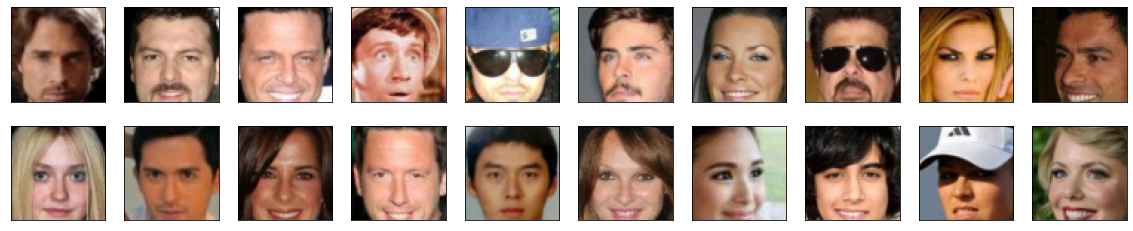

In [6]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""

def denormalize(images):
    """Transform images from [-1.0, 1.0] to [0, 255] and cast them to uint8."""
    return ((images + 1.) / 2. * 255).astype(np.uint8)

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
    img = dataset[idx].numpy()
    img = np.transpose(img, (1, 2, 0))
    img = denormalize(img)
    ax.imshow(img)

## Model implementation

As you know, a GAN is comprised of two adversarial networks, a discriminator and a generator. Now that we have a working data pipeline, we need to implement the discriminator and the generator. 

Feel free to implement any additional class or function.

### Exercise: Create the discriminator

The discriminator's job is to score real and fake images. You have two constraints here:
* the discriminator takes as input a **batch of 64x64x3 images**
* the output should be a single value (=score)

Feel free to get inspiration from the different architectures we talked about in the course, such as DCGAN, WGAN-GP or DRAGAN.

#### Some tips
* To scale down from the input image, you can either use `Conv2d` layers with the correct hyperparameters or Pooling layers.
* If you plan on using gradient penalty, do not use Batch Normalization layers in the discriminator.

In [31]:
from torch.nn import Module

In [32]:
##### set some hyperparameters here #####

batch_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

In [33]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # TODO: instantiate the different layers
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # TODO: implement the forward method
        x=self.main(x)
        return x

In [10]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to check your discriminator implementation
discriminator = Discriminator()
tests.check_discriminator(discriminator)

Congrats, your discriminator implementation passed all the tests


### Exercise: create the generator

The generator's job creates the "fake images" and learns the dataset distribution. You have three constraints here:
* the generator takes as input a vector of dimension `[batch_size, latent_dimension, 1, 1]`
* the generator must outputs **64x64x3 images**

Feel free to get inspiration from the different architectures we talked about in the course, such as DCGAN, WGAN-GP or DRAGAN.

#### Some tips:
* to scale up from the latent vector input, you can use `ConvTranspose2d` layers
* as often with Gan, **Batch Normalization** helps with training

In [34]:
class Generator(nn.Module):
    def __init__(self, latent_dim: int):
        super(Generator, self).__init__()
        # TODO: instantiate the different layers
        nz = latent_dim
        self.main_2 = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # TODO: implement the forward method
        return self.main_2(x)

In [35]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
# run this cell to verify your generator implementation
latent_dim = 128
generator = Generator(latent_dim)
tests.check_generator(generator, latent_dim)

Congrats, your generator implementation passed all the tests


## Optimizer

In the following section, we create the optimizers for the generator and discriminator. You may want to experiment with different optimizers, learning rates and other hyperparameters as they tend to impact the output quality.

### Exercise: implement the optimizers

In [36]:
import torch.optim as optim


def create_optimizers(generator: nn.Module, discriminator: nn.Module):
    """ This function should return the optimizers of the generator and the discriminator """
    # TODO: implement the generator and discriminator optimizers
    g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
    d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))
    
    return g_optimizer, d_optimizer

## Losses implementation

In this section, we are going to implement the loss function for the generator and the discriminator. You can and should experiment with different loss function.

Some tips:
* You can choose the commonly used the binary cross entropy loss or select other losses we have discovered in the course, such as the Wasserstein distance.
* You may want to implement a gradient penalty function as discussed in the course. It is not required and the code will work whether you implement it or not.

### Exercise: implement the generator loss

The generator's goal is to get the discriminator to think its generated images (= "fake" images) are real.

In [38]:
def generator_loss(fake_logits):
    """ Generator loss, takes the fake scores as inputs. """
    # TODO: implement the generator loss 
    # flipped_fake_labels = torch.ones_like(fake_logits)* 0.9 # flipped fake labels = 1
    flipped_fake_labels = torch.ones(batch_size)* 0.9 # flipped fake labels = 1
    
    if train_on_gpu:
        flipped_fake_labels = flipped_fake_labels.cuda()
    
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(fake_logits.squeeze(), flipped_fake_labels)
    return loss

### Exercise: implement the discriminator loss

We want the discriminator to give high scores to real images and low scores to fake ones and the discriminator loss should reflect that.

In [39]:
def discriminator_loss(real_logits, fake_logits):
    """ Discriminator loss, takes the fake and real logits as inputs. """
    # TODO: implement the discriminator loss

    #real_labels = torch.ones_like(real_logits) * 0.9
    #fake_labels = torch.zeros_like(fake_logits) # fake labels = 0
    
    real_labels = torch.ones(batch_size)* 0.9
    fake_labels = torch.zeros(batch_size)

    if train_on_gpu:
        real_labels = real_labels.cuda()
        fake_labels = fake_labels.cuda()
    
    criterion = nn.BCEWithLogitsLoss()
    
    # calculate loss
    fake_loss = criterion(fake_logits.squeeze(), fake_labels)
    real_loss = criterion(real_logits.squeeze(), real_labels)
    
    loss = fake_loss + real_loss
    
    return loss

### Exercise (Optional): Implement the gradient Penalty

In the course, we discussed the importance of gradient penalty in training certain types of Gans. Implementing this function is not required and depends on some of the design decision you made (discriminator architecture, loss functions).

In [40]:
def gradient_penalty(discriminator, real_samples, fake_samples):
    """ This function enforces """
    gp = 0
    # TODO (Optional): implement the gradient penalty
    return gp

## Training


Training will involve alternating between training the discriminator and the generator. You'll use your functions real_loss and fake_loss to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function

### Exercise: implement the generator step and the discriminator step functions

Each function should do the following:
* calculate the loss
* backpropagate the gradient
* perform one optimizer step

In [41]:
def generator_step(batch_size: int, latent_dim: int) -> Dict:
    """ One training step of the generator. """
    # TODO: implement the generator step (foward pass, loss calculation and backward pass)
    g_optimizer.zero_grad()
    z = np.random.uniform(-1, 1, size=(batch_size, latent_dim, 1, 1))
    z = torch.from_numpy(z).float()
    if train_on_gpu:
        z = z.cuda()
    fake_images = generator(z)
    # Compute the discriminator losses on fake images 
    # using flipped labels!
    D_fake = discriminator(fake_images)
    g_loss = generator_loss(D_fake)    
    g_loss.backward()
    g_optimizer.step()
    return {'loss': g_loss}


def discriminator_step(batch_size: int, latent_dim: int, real_images: torch.Tensor) -> Dict:
    """ One training step of the discriminator. """
    # TODO: implement the discriminator step (foward pass, loss calculation and backward pass)
    d_optimizer.zero_grad()
    if train_on_gpu:
        real_images = real_images.cuda()
    D_real = discriminator(real_images)
    
    z = np.random.uniform(-1, 1, size=(batch_size, latent_dim, 1, 1))
    z = torch.from_numpy(z).float()
    # move x to GPU, if available
    if train_on_gpu:
        z = z.cuda()
    fake_images = generator(z)
    D_fake = discriminator(fake_images.detach())    
        
    d_loss = discriminator_loss(D_real, D_fake)
    d_loss.backward()
    d_optimizer.step()
    gp=0
    return {'loss': d_loss, 'gp': gp}

### Main training loop

You don't have to implement anything here but you can experiment with different hyperparameters.

In [42]:
from datetime import datetime

In [43]:
# you can experiment with different dimensions of latent spaces
latent_dim = 128

# update to cpu if you do not have access to a gpu

#device = 'cuda'

if train_on_gpu:
    device = 'cuda'
else:
    device = 'cpu'
        

# number of epochs to train your model
n_epochs = 2

In [44]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
print_every = 50

# Create optimizers for the discriminator D and generator G
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
g_optimizer, d_optimizer = create_optimizers(generator, discriminator)

dataloader = DataLoader(dataset, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        num_workers=4,   # can be 4 with GPU!
                        drop_last=True,
                        pin_memory=False)

In [45]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""

def display(fixed_latent_vector: torch.Tensor):
    """ helper function to display images during training """
    fig = plt.figure(figsize=(14, 4))
    plot_size = 16
    for idx in np.arange(plot_size):
        ax = fig.add_subplot(2, int(plot_size/2), idx+1, xticks=[], yticks=[])
        img = fixed_latent_vector[idx, ...].detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = denormalize(img)
        ax.imshow(img)
    plt.show()

### Exercise: implement the training strategy

You should experiment with different training strategies. For example:

* train the generator more often than the discriminator. 
* added noise to the input image
* use label smoothing

Implement with your training strategy below.

In [46]:

### demonstration by giving noise as inputs ########
noise_vector = torch.randn(16, latent_dim, 1, 1).float().cuda()


losses = []
for epoch in range(n_epochs):
    for batch_i, real_images in enumerate(dataloader):
        real_images = real_images.to(device)
        
        ####################################
        
        # TODO: implement the training strategy
        
        nr_train_for_G = 2
        
        for i_train_G in range (nr_train_for_G):
        
            g_loss=generator_step(batch_size,latent_dim) 
        
        d_loss=discriminator_step(batch_size,latent_dim,real_images)
        
        ####################################
        
        if batch_i % print_every == 0:
            # append discriminator loss and generator loss
            d = d_loss['loss'].item()
            g = g_loss['loss'].item()
            losses.append((d, g))
            # print discriminator and generator loss
            time = str(datetime.now()).split('.')[0]
            print(f'{time} | Epoch [{epoch+1}/{n_epochs}] | Batch {batch_i}/{len(dataloader)} | d_loss: {d:.4f} | g_loss: {g:.4f}')
    
    # display images during training
    generator.eval()
    generated_images = generator(noise_vector)
    display(generated_images)
    generator.train()

2023-05-06 11:53:02 | Epoch [1/2] | Batch 0/509 | d_loss: 1.7907 | g_loss: 0.4410
2023-05-06 11:56:51 | Epoch [1/2] | Batch 50/509 | d_loss: 1.1065 | g_loss: 0.6931
2023-05-06 12:00:56 | Epoch [1/2] | Batch 100/509 | d_loss: 1.1093 | g_loss: 0.6931
2023-05-06 12:04:41 | Epoch [1/2] | Batch 150/509 | d_loss: 1.1065 | g_loss: 0.6931
2023-05-06 12:08:45 | Epoch [1/2] | Batch 200/509 | d_loss: 1.1065 | g_loss: 0.6931
2023-05-06 12:12:22 | Epoch [1/2] | Batch 250/509 | d_loss: 1.1065 | g_loss: 0.6931


KeyboardInterrupt: 

### Training losses

Plot the training losses for the generator and discriminator.

In [ ]:
"""
DO NOT MODIFY ANYTHING IN THIS CELL
"""
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result
* Loss functions

**Answer:** (Write your answer in this cell)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb".  

Submit the notebook using the ***SUBMIT*** button in the bottom right corner of the Project Workspace.